# Proyecto Analítica - Final

In [2]:
#@title #Proyecto Analítica - Final
Estudiantes = "Sebastian Andrade - Belen Begnini & Andre Sarmiento" #@param {type:"string"}
Códigos = "00323004 - 00216617 & 00216220" #@param {type:"string"}

## 1. - Generar un Exploratory Data Analysis (EDA) en Python: se deben incluir, por lo menos, los siguientes puntos (sin estar únicamente limitados a los mismos): 

### 1.1 y 1.2. - Describir generalmente la base de datos, incluyendo el tamaño, tipos de datos, valores nulos/blancos, valores atípicos. Detallar el criterio empleado para manejo de valores nulos y/o atípicos (si aplica): ¿qué se hizo con ellos?, ¿cómo los gestionaron?, etc

Cargamos la base da datos e identificamos el tamaño y tipos de datos

In [3]:
#Importamos pandas para cargar la base de datos
import pandas as pd

In [4]:
#La función "read_csv()" de Pandas se utiliza para leer un archivo CSV
#El parámetro "encoding" se establece en "cp1252", que es la codificación de caracteres utilizada para el archivo CSV
#El DataFrame se almacena en la variable "HospitalData_df"
HospitalData_df=pd.read_csv("PublicHospitalDataset.csv", encoding = 'cp1252')

In [5]:
#Vamos a trabajar con una copia del DataFrame para manipular y analizar los datos sin alterar el archivo original
HospitalData_dfcopy=HospitalData_df

In [6]:
#Observamos el tamaño de la base de datos (filas,columnas)
print(HospitalData_dfcopy.shape)

(5110, 11)


In [7]:
#Mostrar los tipos de datos de cada columna del DataFrame.
HospitalData_dfcopy.dtypes

Hypertension           int64
Heart Disease          int64
Married               object
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                  float64
Stroke                 int64
dtype: object

Para saber los valores atípicos de las variables continuas se utiliza la regla del rango intercuartil (IQR):
En esta técnica, primero se calcula el rango intercuartil, que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1) de los datos. Luego, cualquier valor que sea menor que Q1 - 1.5 x IQR o mayor que Q3 + 1.5 x IQR se considera un valor atípico y se puede eliminar.

In [8]:
#Importamos la librería numpy
import numpy as np

# Creamos una lista de variables continuas
continuous_vars = ['Age', 'Avg_glucose_level', 'Bmi']

# Iterar sobre cada variable continua
for var in continuous_vars:
    # Calcular los cuartiles
    Q1 = HospitalData_dfcopy[var].quantile(0.25)
    Q3 = HospitalData_dfcopy[var].quantile(0.75)

    # Calcular el rango intercuartil
    IQR = Q3 - Q1

    # Determinar los límites inferior y superior
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Determinar los valores menores al límite inferior o mayores al superior
    outliers = HospitalData_dfcopy[(HospitalData_dfcopy[var] < lower_limit) | (HospitalData_dfcopy[var] > upper_limit)]
   
    #Imprimir el nombre de la columna
    print('\n',var + ':')
    
    #Imprimir los valores únicos de dicha columna
    print(outliers[var].unique())
    
    #Imprimir el recuento total de valores atípicos usando la función value_counts() y sum() 
    print('Se registaron', outliers[var].value_counts().sum(),'valores atípicos en columna', var)
    
    #Referencias: 
    #https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
    #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
    


 Age:
[]
Se registaron 0 valores atípicos en columna Age

 Avg_glucose_level:
[228.69 202.21 171.23 174.12 186.21 219.84 214.09 191.61 221.29 217.08
 193.94 233.29 228.7  208.3  189.84 195.23 211.78 212.08 196.92 252.72
 219.72 213.03 243.58 197.54 196.71 237.75 194.99 180.93 185.17 221.58
 179.12 228.56 240.09 226.98 235.63 240.59 190.32 231.61 191.82 224.1
 216.94 259.63 249.31 219.91 200.59 190.14 182.99 206.09 263.32 207.28
 194.37 199.2  221.79 239.07 169.67 223.83 231.56 221.89 195.71 203.87
 185.49 213.22 215.94 209.86 205.77 271.74 200.62 242.52 175.29 208.65
 205.33 210.4  199.86 219.73 250.89 205.35 216.58 184.4  199.84 218.46
 211.06 197.28 233.94 247.51 210.95 243.53 205.84 198.21 206.72 214.45
 190.7  203.04 242.3  220.49 216.7  234.58 235.85 243.5  182.2  229.92
 215.6  239.64 200.28 205.23 209.58 210.78 251.6  213.37 223.36 178.29
 203.81 205.26 211.03 225.47 180.63 227.1  201.76 170.05 217.3  196.01
 184.15 198.69 186.17 183.45 210.48 193.83 183.34 247.69 191.47 239.82

En este caso, a simple vista, el valor atípico que claramente es un error me medición es de 40000 y se encuentra en la columna 'Bmi'. Antes de eliminar los registros con este dato vamos a ver si existen muchos casos como este para determinar si se debería tomar otras medidas. Para el resto de valores atípicos se desconoce si son una parte legítima de los datos por lo cual se los mantiene.

In [9]:
#Con la función isin() verificamos si los valores de una lista o serie están presentes en otra
#si añadimos sum() contamos el número de valores coincidentes
print(HospitalData_dfcopy['Bmi'].isin([40000]).sum())

#Referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html?highlight=isin#pandas.DataFrame.isin

4


Como solamente se encontraron 4 registros vamos a eliminar estos.

In [10]:
#La función isin() se utiliza para crear una serie booleana 
#que indica si cada valor de la columna "Bmi" está presente en la lista [40000].
#La tilde ~ se utiliza para invertir esta serie booleana, es decir, 
#para seleccionar todas las filas donde el valor de la columna "Bmi" no está presente en la lista [40000].
HospitalData_dfcopy = HospitalData_dfcopy[~HospitalData_dfcopy['Bmi'].isin([40000])]

In [11]:
#Volmenos a ver el tamaño del Dataframe
print(HospitalData_dfcopy.shape)

(5106, 11)


Para saber los valores atípicos de las variables categóricas primero se va a identificar y contar los valores únicos de cada columna

In [12]:
#Se usa la función 'for' para imprimir el recuento de cada valor único en cada columna en el DataFrame
#select_dtypes() sirve para filtrar el tipo de dato, en este caso los valores de tipo 'object'
#
for col in HospitalData_dfcopy.select_dtypes(include=['object']).columns:
    print('\n',col + ':')
    print(HospitalData_dfcopy[col].value_counts())


 Married:
Yes    3351
No     1755
Name: Married, dtype: int64

 Work:
Private          2916
Self-employed     818
children          686
Govt_job          657
Never_worked       22
sdfsdf              3
dsfsdf              2
k–sdh-k             1
sdsd-i              1
Name: Work, dtype: int64

 Residence:
Urban    2594
Rural    2512
Name: Residence, dtype: int64

 Smoking:
never smoked       1891
Unknown            1542
formerly smoked     884
smokes              789
Name: Smoking, dtype: int64

 Gender:
Female    2991
Male      2114
Other        1
Name: Gender, dtype: int64


Se observa que en la columna 'Work' existe tres distintos valores que no constan en la descripción de las variables de la base de datos médica: 'sdsd-i', 'dsfsdf', 'k–sdh-k'y 'sdfsdf'. Como unicamente son 7 registros los implicados se pueden eliminar sin afectar gravemente la base de datos.

In [13]:
#Verificamos que son 7 los registros a eliminar con las funciones isin y sum como se explicó anteriormente
print(HospitalData_dfcopy['Work'].isin(['sdsd-i', 'dsfsdf', 'k–sdh-k', 'sdfsdf']).sum())

7


In [14]:
#Se eliminan los registros que coincidan que la lista ['sdsd-i', 'dsfsdf', 'sdfsdf'] 
#en la columna 'Work' de la misma forma que se realizo en la columna 'Bmi'
HospitalData_dfcopy = HospitalData_dfcopy[~HospitalData_dfcopy['Work'].isin(['sdsd-i', 'dsfsdf', 'k–sdh-k', 'sdfsdf'])]

In [15]:
#Volmenos a ver el tamaño del Dataframe
print(HospitalData_dfcopy.shape)

(5099, 11)


De la misma forma, en cuanto a la columna 'Gender' se observa que solo existe un registro identificado como Other, por lo cual sería un dato atípico

In [16]:
#Se eliminan los registros que coincidan que la lista ['Other'] 
#en la columna 'Gender' como se realizó anteriormente
HospitalData_dfcopy = HospitalData_dfcopy[~HospitalData_dfcopy['Gender'].isin(['Other'])]

In [17]:
#Volmenos a ver el tamaño del Dataframe
print(HospitalData_dfcopy.shape)

(5098, 11)


Identificamos si existen valores nulos y en blanco para cada columna

In [18]:
#Con la función isnull() identificamos cuales valores son nulos y cuales no
#Si añadimos sum() obtendremos el número de valores nulos en cada columna
print(HospitalData_dfcopy.isnull().sum())

Hypertension           0
Heart Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  200
Smoking                0
Gender                 0
Age                    0
Stroke                 0
dtype: int64


Dado que la cantidad de registros con valores faltantes en la columna 'Bmi' es pequeña en comparación con el tamaño total del DataFrame (solo el 3.9%), entonces una opción podría ser reemplazar los valores faltantes por la media, mediana o moda de la columna 'Bmi', ya que esto no debería afectar significativamente el análisis y modelado de los datos. Si la distribución de los datos es simétrica o aproximadamente simétrica, se puede utilizar la media para reemplazar los valores faltantes. Por otro lado, si la distribución de los datos es sesgada, se recomienda utilizar la mediana para reemplazar los valores faltantes.

Graham, J. W. (2009). Missing data analysis: making it work in the real world. Annual review of psychology, 60, 549-576.

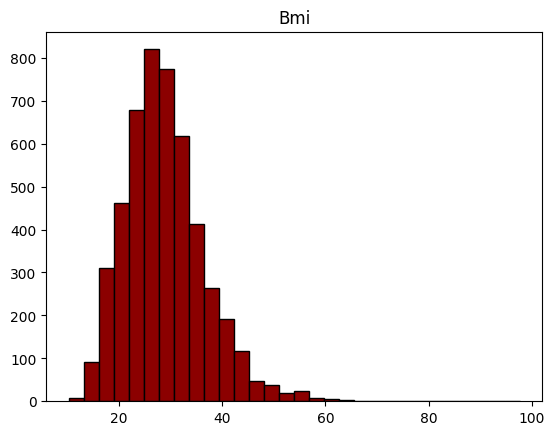

In [19]:
#Importamos la libería matplotlib
import matplotlib.pyplot as plt

#Realizamos un histograma para ver la distribución de la variable
plt.hist(HospitalData_dfcopy['Bmi'], bins=30, color = "darkred", edgecolor = "black")
plt.title("Bmi")
plt.show()

#Referencia: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

 En este caso, dado que la distribución tiene un sesgo positivo la mediana es una técnica de imputación simple y adecuada que puede ser utilizada.

In [20]:
#Creamos una variable con la mediana de la columa
median_bmi = HospitalData_dfcopy['Bmi'].median()

#Rellenamos los valores faltantes con la varible creada
HospitalData_dfcopy['Bmi'] = HospitalData_dfcopy['Bmi'].fillna(median_bmi)

#Referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [21]:
#Comprobamos que no existan valores nulos
print(HospitalData_dfcopy.isnull().sum())

Hypertension         0
Heart Disease        0
Married              0
Work                 0
Residence            0
Avg_glucose_level    0
Bmi                  0
Smoking              0
Gender               0
Age                  0
Stroke               0
dtype: int64


### 1.3 Analice la correlación entre variables predictivas. ¿Cuáles variables parecen afectar a la variable respuesta? 

Primero se convertirá las variables categóricas a dummies

In [22]:
#Se utiliza un bucle for para recorrer todas las columnas del DataFrame que contienen variables de tipo "object"
for col in HospitalData_dfcopy.select_dtypes(include=['object']).columns:
    
#Para cada una de estas columnas, se utiliza la función pd.get_dummies() para crear variables dummies.
    dummies = pd.get_dummies(HospitalData_dfcopy[col], prefix=col, drop_first=True)
    
#Se concatena con el DataFrame usando la función pd.concat().
    HospitalData_dfcopy = pd.concat([HospitalData_dfcopy, dummies], axis=1)
    
#La columna original se elimina del DataFrame usando el método drop() de Pandas.
    HospitalData_dfcopy.drop(col, axis=1, inplace=True)

#Referencia: https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [23]:
#Observamos que las variable tipo object ahora sean enteras
HospitalData_dfcopy.dtypes

Hypertension                 int64
Heart Disease                int64
Avg_glucose_level          float64
Bmi                        float64
Age                        float64
Stroke                       int64
Married_Yes                  uint8
Work_Never_worked            uint8
Work_Private                 uint8
Work_Self-employed           uint8
Work_children                uint8
Residence_Urban              uint8
Smoking_formerly smoked      uint8
Smoking_never smoked         uint8
Smoking_smokes               uint8
Gender_Male                  uint8
dtype: object

In [24]:
#Ordenamos según el nombre
HospitalData_dfcopy = HospitalData_dfcopy.sort_index(axis=1)

In [25]:
#Cambiamos el nombre de ciertas columnas para mayor claridad
HospitalData_dfcopy.rename(columns={'Age': 'age', 'Avg_glucose_level': 'glucose_level', 'Bmi': 'bmi', 'Heart Disease': 'heart_disease', 'Hypertension' : 'hypertension', 'Married_Yes': 'married', 'Work_Never_worked': 'never_worked', 'Work_Self-employed': 'self_employed','Work_children': 'children', 'Smoking_formerly smoked': 'formerly_smoked', 'Smoking_never smoked': 'never_smoked','Smoking_smokes':'smokes','Gender_Male':'male'}, inplace=True)

In [26]:
#Vemos el resultado
HospitalData_dfcopy.head()

,age,glucose_level,bmi,male,heart_disease,hypertension,married,Residence_Urban,formerly_smoked,never_smoked,smokes,Stroke,never_worked,Work_Private,self_employed,children
0,67.0,228.69,36.6,1,1,0,1,1,1,0,0,1,0,1,0,0
1,61.0,202.21,28.1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,80.0,105.92,32.5,1,1,0,1,0,0,1,0,1,0,1,0,0
3,49.0,171.23,34.4,0,0,0,1,1,0,0,1,1,0,1,0,0
4,79.0,174.12,24.0,0,0,1,1,0,0,1,0,1,0,0,1,0


Para analizar cómo las variables predictivas pueden afectar la variable de respuesta "Stroke", se puede buscar las correlaciones más altas entre la variable "Stroke" y las otras variables. Las variables que tienen una correlación alta y positiva con la variable "Stroke" son las que pueden afectar su valor.

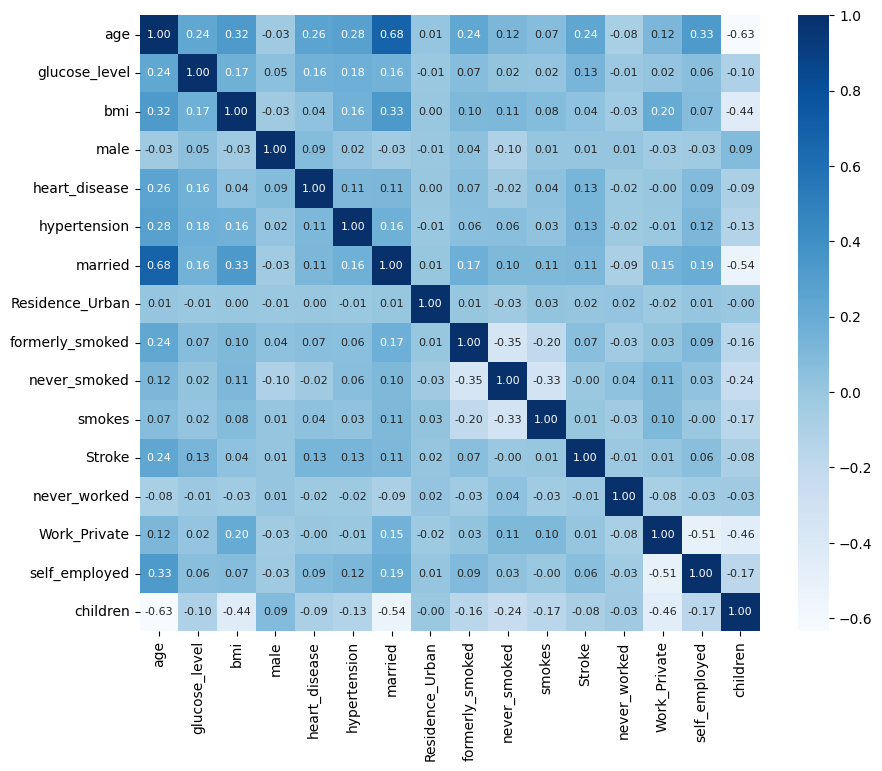

In [27]:
#Se importa las librerías 'seaborn' y 'matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 8))

#Se calcula la matriz de correlación utilizando el método 'corr()' y la almacena en la variable 'correlation'.
correlation = HospitalData_dfcopy.corr()

#Se utiliza la función 'heatmap()' de 'seaborn' para visualizar la matriz de correlación como un mapa de calor, se utiliza colores para personas daltonicas.
colors = plt.cm.Blues

sns.heatmap(correlation, annot=True, cmap=colors, fmt='.2f', annot_kws={"size": 8})

#Se muestra
plt.show()

#Referencias: 
#https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

En la matriz de correlación, los valores varían entre -1 y 1, donde -1 indica una correlación negativa perfecta, 0 indica ninguna correlación y 1 indica una correlación positiva perfecta. Los valores cercanos a 0 indican que las variables no están correlacionadas, mientras que los valores cercanos a -1 o 1 indican que las variables están altamente correlacionadas.

Las varibales predictivas que pueden afectar a tener un ataque cerebral son: la edad, el nivel de glucosa promedio, si se tiene una enfermedad cardiaca, si se sufre de hipertensión y si se está casado.

Es importante tener en cuenta que la correlación no siempre implica causalidad. Aunque dos variables pueden estar altamente correlacionadas, no significa necesariamente que una variable cause la otra.

### 1.4 Visualización de Datos: Visualice todas las variables predictivas y describa su distribución. Analice la distribución de la variable respuesta.

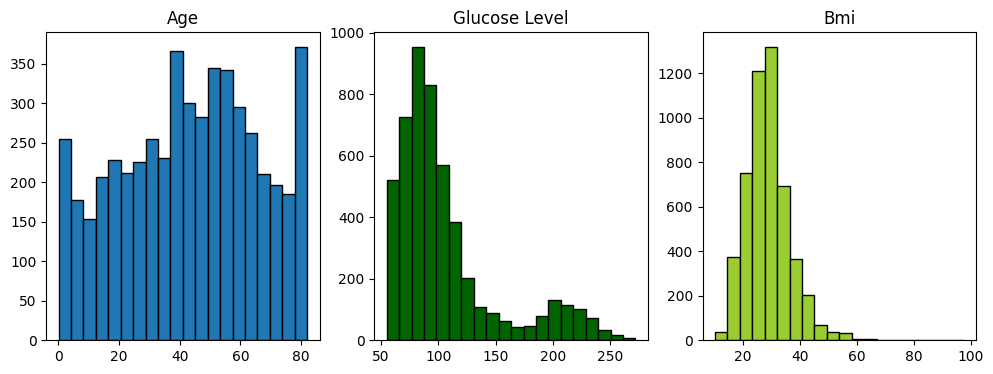

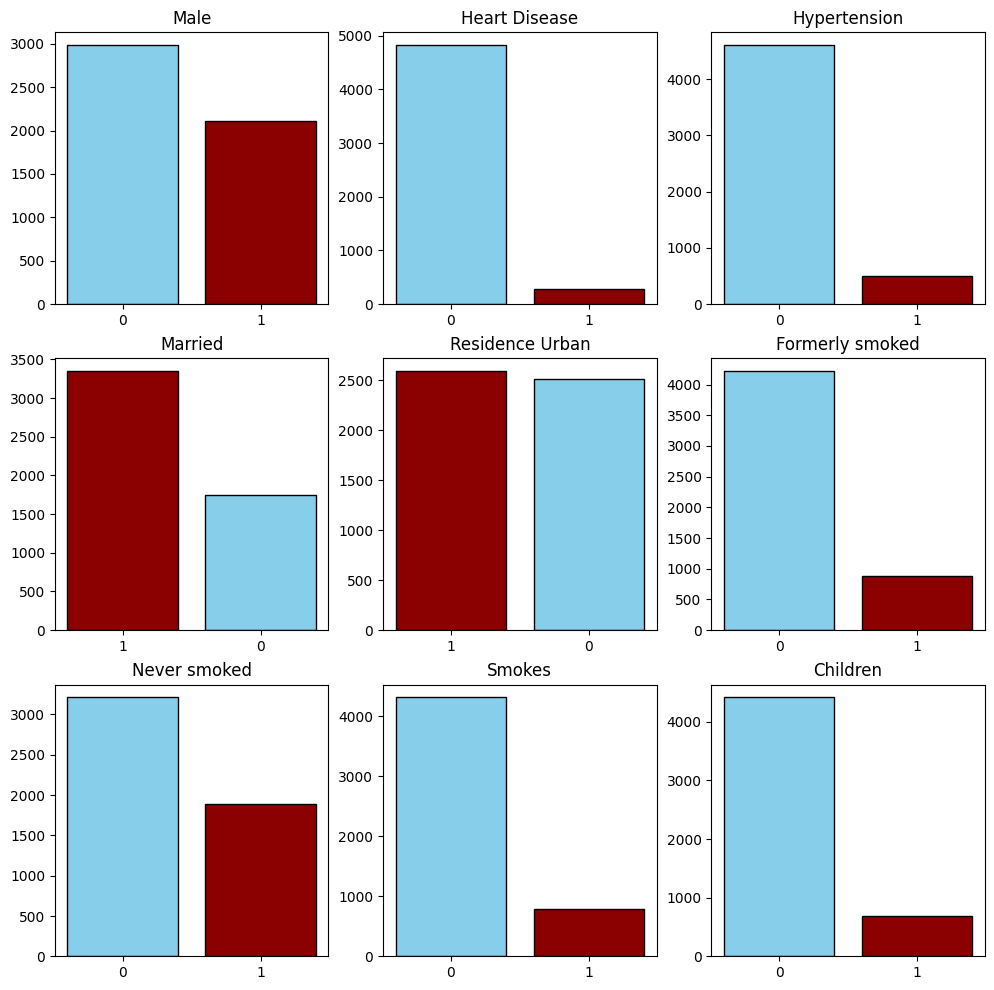

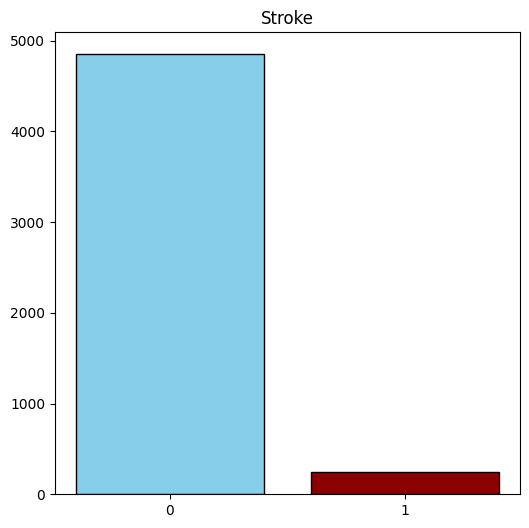

In [28]:
# Histogramas de las variables continuas
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].hist(HospitalData_dfcopy['age'], bins=20, edgecolor = "black")
axs[0].set_title('Age')
axs[1].hist(HospitalData_dfcopy['glucose_level'], bins=20,color=['darkgreen'], edgecolor = "black")
axs[1].set_title('Glucose Level')
axs[2].hist(HospitalData_dfcopy['bmi'], bins=20,color=['yellowgreen'], edgecolor = "black")
axs[2].set_title('Bmi')
plt.show()


# Tablas de frecuencia de las variables categóricas
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
axs[0,0].bar(HospitalData_dfcopy['male'].value_counts().index.astype(str), HospitalData_dfcopy['male'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[0,0].set_title('Male')
axs[0,1].bar(HospitalData_dfcopy['heart_disease'].value_counts().index.astype(str), HospitalData_dfcopy['heart_disease'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[0,1].set_title('Heart Disease')
axs[0,2].bar(HospitalData_dfcopy['hypertension'].value_counts().index.astype(str), HospitalData_dfcopy['hypertension'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[0,2].set_title('Hypertension')
axs[1,0].bar(HospitalData_dfcopy['married'].value_counts().index.astype(str), HospitalData_dfcopy['married'].value_counts(),color=['darkred', 'skyblue'], edgecolor = "black")
axs[1,0].set_title('Married')
axs[1,1].bar(HospitalData_dfcopy['Residence_Urban'].value_counts().index.astype(str), HospitalData_dfcopy['Residence_Urban'].value_counts(),color=['darkred', 'skyblue'], edgecolor = "black")
axs[1,1].set_title('Residence Urban')
axs[1,2].bar(HospitalData_dfcopy['formerly_smoked'].value_counts().index.astype(str), HospitalData_dfcopy['formerly_smoked'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[1,2].set_title('Formerly smoked')
axs[2,0].bar(HospitalData_dfcopy['never_smoked'].value_counts().index.astype(str), HospitalData_dfcopy['never_smoked'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[2,0].set_title('Never smoked')
axs[2,1].bar(HospitalData_dfcopy['smokes'].value_counts().index.astype(str), HospitalData_dfcopy['smokes'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[2,1].set_title('Smokes')
axs[2,2].bar(HospitalData_dfcopy['children'].value_counts().index.astype(str), HospitalData_dfcopy['children'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[2,2].set_title('Children')
plt.show()



# Gráfico de barras de la variable respuesta
fig, axs = plt.subplots(figsize=(6, 6))
axs.bar(HospitalData_dfcopy['Stroke'].value_counts().index.astype(str), HospitalData_dfcopy['Stroke'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs.set_title('Stroke')
plt.show()


In [29]:
#Se hará el recuento de las observaciones que tuvieron un ataque cerebral con las que no
HospitalData_dfcopy['Stroke'].value_counts()

0    4851
1     247
Name: Stroke, dtype: int64

Con respecto a la variable de respuesta, se observa que casi el total de las observaciones (95.15%) son que no se tuvo ningun ataque cerebral, por lo cual la base de datos está desbalanceada.

## 2 y 3. - La base de datos no está balanceada (en inglés conocida como unbalanced dataset). Investigue que es una base de datos no balanceada utilizando fuentes de referencia confiables (libros y papers), los problemas con este tipo de base de datos y al menos dos técnicas utilizadas durante el entrenamiento del algoritmo para reducir su efecto negativo. Divida la base de datos en un set de entrenamiento, un set de validación y un set de prueba. Justifique en base a la literatura el porcentaje de datos que se va a cada set (incluya al menos una referencia de papers o libros sobre este porcentaje, los slides de la clase no es una referencia válida) 

Una base de datos no balanceada es aquella en la que las clases o categorías de la variable objetivo están desproporcionadamente representadas en comparación con las otras clases o categorías. Por ejemplo, si una base de datos de detección de fraude en tarjetas de crédito tiene un 99% de transacciones legítimas y solo un 1% de transacciones fraudulentas, se dice que la base de datos está desbalanceada.

Los problemas que surgen cuando se trabaja con bases de datos no balanceadas son variados, pero se pueden resumir en:

1. La precisión de la predicción de la clase minoritaria puede ser muy baja.
2. El modelo puede sesgarse hacia la clase mayoritaria.
3. Las métricas de evaluación pueden ser engañosas, ya que no reflejan la capacidad del modelo para identificar la clase minoritaria.
4. Puede haber problemas de generalización, ya que el modelo puede haber sido entrenado solo con datos de la clase mayoritaria.

Para reducir el efecto negativo de una base de datos no balanceada en el entrenamiento del algoritmo, existen varias técnicas que se pueden aplicar. Algunas de ellas son:

1. Sobremuestreo de la clase minoritaria: consiste en aumentar el número de instancias de la clase minoritaria mediante la creación de copias o réplicas de los datos existentes. Se pueden utilizar técnicas como SMOTE (Synthetic Minority Over-sampling Technique) o ADASYN (Adaptive Synthetic Sampling) para generar datos sintéticos de la clase minoritaria.

2. Submuestreo de la clase mayoritaria: consiste en reducir el número de instancias de la clase mayoritaria para equilibrar la distribución de clases. Esto se puede lograr mediante técnicas como la eliminación aleatoria o la selección de instancias más representativas.

3. Utilización de algoritmos de clasificación específicos para desbalanceo: existen algoritmos que han sido diseñados específicamente para manejar bases de datos desbalanceadas, como Balanced Random Forests, EasyEnsemble o RUSBoost.

4. Ajuste de los umbrales de decisión: en algunos casos, los umbrales de decisión del modelo pueden ser ajustados para mejorar la precisión en la clase minoritaria.

En este ejemplo, primero se utilizará la técnica de sobremuestreo SMOTE para aumentar el tamaño de la clase minoritaria. Luego, se aplica la técnica de submuestreo RandomUnderSampler para reducir el tamaño de la clase mayoritaria. El resultado es un conjunto de datos balanceado que se puede utilizar para entrenar modelos de aprendizaje automático.

Con respecto a la división de la base de datos; el porcentaje de datos que se asigna a cada set depende de varios factores, como el tamaño del conjunto de datos, la complejidad del modelo, la cantidad de hiperparámetros que se deben ajustar y el equilibrio entre la precisión y la generalización del modelo.

En general, se recomienda que se reserve al menos el 20% de los datos para el set de prueba, y que el resto se divida en un set de entrenamiento y un set de validación. Por ejemplo, una división común puede ser 60% para el set de entrenamiento, 20% para el set de validación y 20% para el set de prueba. Esta división proporciona suficientes datos para entrenar el modelo, ajustar sus hiperparámetros y evaluar su rendimiento de manera independiente. Por lo tanto, será esta la división a utilizar.

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction. Springer.

García, S., Fernández, A., García, S., & Herrera, F. (2009). A study of the behaviour of linguistic fuzzy rule-based classification systems in the framework of imbalanced data-sets. Fuzzy Sets and Systems, 160(18), 2618-2639. https://doi.org/10.1016/j.fss.2009.04.010

He, H., & Garcia, E. A. (2009). Learning from imbalanced data. IEEE Transactions on knowledge and data engineering, 21(9), 1263-1284. https://doi.org/10.1109/TKDE.2008.239

Fernández-Delgado, M., Cernadas, E., Barro, S., & Amorim, D. (2014). Do we need hundreds of classifiers to solve real world classification problems?. Journal of Machine Learning Research, 15(1), 3133-3181. https://jmlr.org/papers/volume15/delgado14a/delgado14a.pdf

In [30]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 57.3 MB/s eta 0:00:00


In [32]:
# importar librerías necesarias
from sklearn.model_selection import train_test_split

# dividir el dataframe en conjuntos de entrenamiento, validación y prueba
# se utiliza la función train_test_split para dividir el conjunto de datos original,
#con un tamaño de prueba del 20% y un tamaño de entrenamiento y validación del 80%.
X_train_val, X_test, y_train_val, y_test = train_test_split(HospitalData_dfcopy.drop('Stroke', axis=1), HospitalData_dfcopy['Stroke'], test_size=0.2, random_state=1)

#Vuelve a dividir el conjunto de entrenamiento y validación en dos conjuntos separados,
#con un tamaño de validación del 25% y un tamaño de entrenamiento del 75%.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1)

# imprimir las números de registros

print("Registros en el conjunto de entrenamiento:", X_train.shape[0])
print("Registros en el conjunto de validación:", X_val.shape[0])
print("Registros en el conjunto de prueba:", X_test.shape[0])

#Referencia: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Registros en el conjunto de entrenamiento: 3058
Registros en el conjunto de validación: 1020
Registros en el conjunto de prueba: 1020


Al realizar un balanceo completo del data frame podemos observar que:

Registros en el conjunto de entrenamiento: 5852

Registros en el conjunto de validación: 1020

Registros en el conjunto de prueba: 1020

## 4. - Implemente un algoritmo y estadísticamente pruebe cuál de las dos técnicas mencionadas en el punto anterior mejora la predicción.

In [33]:
# importar librerías necesarias
from imblearn.over_sampling import SMOTE

# utilizar SMOTE para aumentar la cantidad de muestras en la clase minoritaria en el conjunto de entrenamiento
smote = SMOTE(random_state=1)
X_train_resampled_s, y_train_resampled_s = smote.fit_resample(X_train, y_train)

# imprimir las números de registros
print("Registros en el conjunto de entrenamiento:", X_train_resampled_s.shape[0])

# Código base tomado de: https://colab.research.google.com/drive/1cJEOztGiQNdE0_bQemb-YZL5ct7scwqZ#scrollTo=0INKWhS1R_dN

Registros en el conjunto de entrenamiento: 5852


In [34]:
# importar librerías necesarias
from imblearn.under_sampling import RandomUnderSampler

# utilizar RandomUnderSampler para reducir la cantidad de muestras en la clase mayoritaria en el conjunto de entrenamiento
rus = RandomUnderSampler(random_state=1)
X_train_resampled_r, y_train_resampled_r = rus.fit_resample(X_train, y_train)

# imprimir las números de registros
print("Registros en el conjunto de entrenamiento:", X_train_resampled_r.shape[0])

# Código base tomado de: https://colab.research.google.com/drive/1cJEOztGiQNdE0_bQemb-YZL5ct7scwqZ#scrollTo=0INKWhS1R_dN

Registros en el conjunto de entrenamiento: 264


In [35]:
# Se crea la función para hacer la matriz de confusion y calcular la precisión, recall y f1-score

def plot_confusion_matrix(y_true, y_pred, labels = ['No', 'Si']):
    """
    Grafica una matriz de confusión basada en las etiquetas verdaderas y predichas.
    """

    # se calcula la matriz de confunsión
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    

    # se calcula la sensividad y especificidad
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    fpr = fp / (fp + tn)

    # se define el mapa de color
    cmap = plt.cm.get_cmap('Reds', 2)

    # se obtiene la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
  

    # dibuja la matriz de confusión con el mapa de color
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig = plt.figure(figsize=(4, 4))
    disp.plot(cmap=cmap)
    

    plt.show()

    

    print('tn', tn,'fp', fp)
    print('fn', fn,'tp', tp)

    print('Sensitivity / Recall / TPR:', sensitivity)
    print('Specificity / selectivity / TNR:', specificity)
    print('Fallout / FPR:', precision)
    print('Precision / Positive predicted value:', fpr)

    # Código base tomado de: https://colab.research.google.com/drive/1cJEOztGiQNdE0_bQemb-YZL5ct7scwqZ#scrollTo=0INKWhS1R_dN

## SMOTE

In [36]:
# Importar matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors = 6)

# Ajustar el modelo a los datos de entrenamiento
knn.fit(X_train_resampled_s, y_train_resampled_s)

# Predecir las etiquetas de los datos de prueba: y_pred
y_pred_s = knn.predict(X_test)

# predict probabilities for test set
y_pred_probs_s = knn.predict_proba(X_test)[:, 1]

# Generar la matriz de confusión y el informe de clasificación
print(confusion_matrix(y_test, y_pred_s))
print(classification_report(y_test, y_pred_s))

# Código base tomado de: https://colab.research.google.com/drive/1cJEOztGiQNdE0_bQemb-YZL5ct7scwqZ#scrollTo=0INKWhS1R_dN

[[818 144]
 [ 23  35]]
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       962
           1       0.20      0.60      0.30        58

    accuracy                           0.84      1020
   macro avg       0.58      0.73      0.60      1020
weighted avg       0.93      0.84      0.87      1020



<ipython-input-35-a2ab39f6846b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 2)


<Figure size 400x400 with 0 Axes>

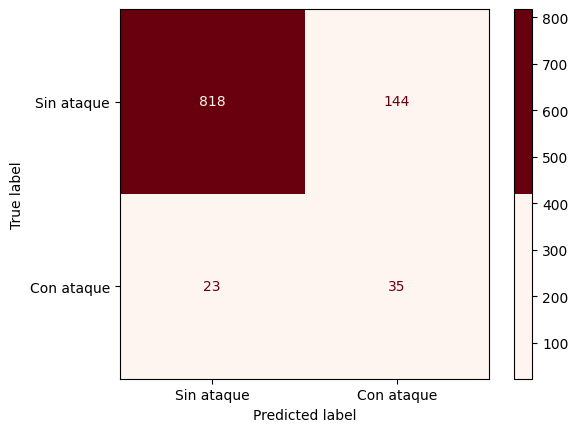

tn 818 fp 144
fn 23 tp 35
Sensitivity / Recall / TPR: 0.603448275862069
Specificity / selectivity / TNR: 0.8503118503118503
Fallout / FPR: 0.19553072625698323
Precision / Positive predicted value: 0.1496881496881497
AUC Score:  0.796616244892107
Un area bajo ROC de 80.0% significa que este modelo es 30.0% mejor que predecir al azar


In [37]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate the confusion matrix para el modelo entrenado con KNN
plot_confusion_matrix(y_test, y_pred_s, ['Sin ataque', 'Con ataque'])

# Calculate the classification report

# Calculate roc_auc_score
auc = roc_auc_score(y_test, y_pred_probs_s)
print('AUC Score: ',auc)
print('Un area bajo ROC de {}% significa que este modelo es {}% mejor que predecir al azar'.format(round(auc*100, 0), round(auc*100-50, 0) ))

# Código base tomado de: https://colab.research.google.com/drive/1cJEOztGiQNdE0_bQemb-YZL5ct7scwqZ#scrollTo=0INKWhS1R_dN

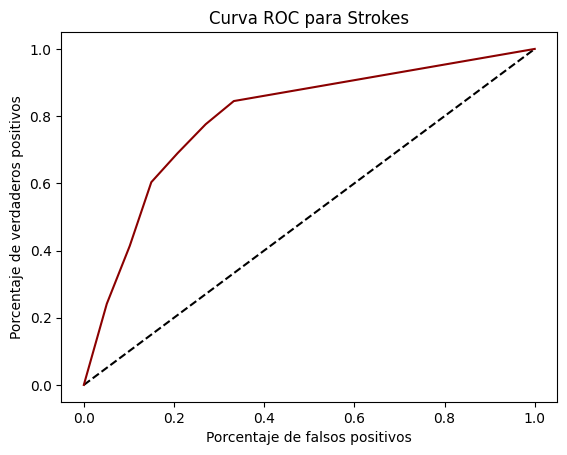

In [38]:
# se importa roc_curve
from sklearn.metrics import roc_curve

# se genera la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_s)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr, color = "darkred")
plt.xlabel('Porcentaje de falsos positivos')
plt.ylabel('Porcentaje de verdaderos positivos')
plt.title('Curva ROC para Strokes')
plt.show()

# Código base tomado de: https://colab.research.google.com/drive/1cJEOztGiQNdE0_bQemb-YZL5ct7scwqZ#scrollTo=0INKWhS1R_dN

## RandomUnderSampler

In [39]:
# Importar matriz de confusión
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors = 6)

# Ajustar el modelo a los datos de entrenamiento
knn.fit(X_train_resampled_r, y_train_resampled_r)

# Predecir las etiquetas de los datos de prueba: y_pred
y_pred_r = knn.predict(X_test)

# predict probabilities for test set
y_pred_probs_r = knn.predict_proba(X_test)[:, 1]

# Generar la matriz de confusión y el informe de clasificación
print(confusion_matrix(y_test, y_pred_r))
print(classification_report(y_test, y_pred_r))

# Código base tomado de: https://colab.research.google.com/drive/1cJEOztGiQNdE0_bQemb-YZL5ct7scwqZ#scrollTo=0INKWhS1R_dN

[[710 252]
 [ 13  45]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       962
           1       0.15      0.78      0.25        58

    accuracy                           0.74      1020
   macro avg       0.57      0.76      0.55      1020
weighted avg       0.93      0.74      0.81      1020



<ipython-input-35-a2ab39f6846b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 2)


<Figure size 400x400 with 0 Axes>

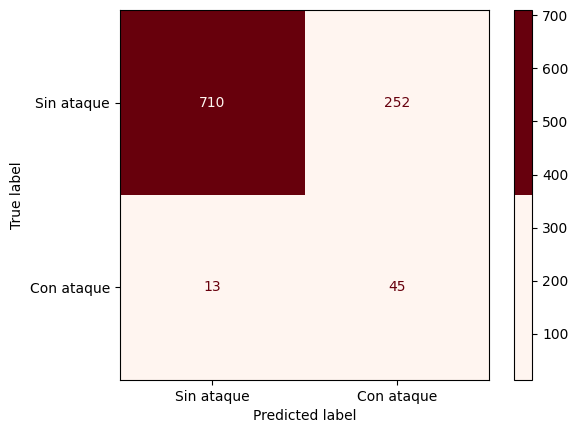

tn 710 fp 252
fn 13 tp 45
Sensitivity / Recall / TPR: 0.7758620689655172
Specificity / selectivity / TNR: 0.738045738045738
Fallout / FPR: 0.15151515151515152
Precision / Positive predicted value: 0.26195426195426197
AUC Score:  0.8307943221736325
Un area bajo ROC de 83.0% significa que este modelo es 33.0% mejor que predecir al azar


In [40]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate the confusion matrix para el modelo entrenado con KNN
plot_confusion_matrix(y_test, y_pred_r, ['Sin ataque', 'Con ataque'])

# Calculate the classification report

# Calculate roc_auc_score
auc = roc_auc_score(y_test, y_pred_probs_r)
print('AUC Score: ',auc)
print('Un area bajo ROC de {}% significa que este modelo es {}% mejor que predecir al azar'.format(round(auc*100, 0), round(auc*100-50, 0) ))

# Código base tomado de: https://colab.research.google.com/drive/1cJEOztGiQNdE0_bQemb-YZL5ct7scwqZ#scrollTo=0INKWhS1R_dN

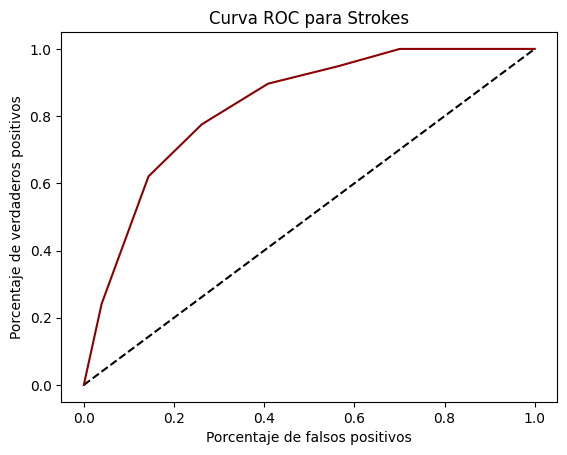

In [41]:
# se importa roc_curve
from sklearn.metrics import roc_curve

# se genera la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_r)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr, color = "darkred")
plt.xlabel('Porcentaje de falsos positivos')
plt.ylabel('Porcentaje de verdaderos positivos')
plt.title('Curva ROC para Strokes')
plt.show()

# Código base tomado de: https://colab.research.google.com/drive/1cJEOztGiQNdE0_bQemb-YZL5ct7scwqZ#scrollTo=0INKWhS1R_dN

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# Define your KNN model
model = KNeighborsClassifier(n_neighbors = 6)

# Define the number of folds for stratified cross-validation
n_folds = 6

# Perform cross-validation on the balanced dataset with SMOTE
smote_scores = cross_val_score(model, X_train_resampled_s, y_train_resampled_s, cv=StratifiedKFold(n_splits=n_folds), scoring='accuracy')

# Perform cross-validation on the balanced dataset with RandomUnderSampler
rus_scores = cross_val_score(model, X_train_resampled_r, y_train_resampled_r, cv=StratifiedKFold(n_splits=n_folds), scoring='accuracy')

# Calculate the average metrics
smote_accuracy = smote_scores.mean()
rus_accuracy = rus_scores.mean()

# Print the results
print("Accuracy de SMOTE es:", smote_accuracy)
print("Accuracy de RandomUnderSampler es:", rus_accuracy)


Accuracy de SMOTE es: 0.8887554294521508
Accuracy de RandomUnderSampler es: 0.7272727272727272


## 5. - Aplique al menos 4 algoritmos en la base de datos utilizando la mejor estrategia de entrenamiento descubierta en el punto 4.

### 5.1 - Al menos 1 algoritmos debe ser un ensamble

#### Random Forest

In [43]:
# se utilizará Random Forest para la predicción usando la base que da el mejor resultado

# se importan las librerias necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# se inicializa el modelo
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model on the training data
rf.fit(X_train_resampled_s, y_train_resampled_s)

# Make predictions on the testing data
y_pred_rf = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Al realizar Random Forest se tiene una precisión de: {accuracy*100}%")


# Código base tomado de: https://gist.github.com/pb111/88545fa33780928694388779af23bf58

Al realizar Random Forest se tiene una precisión de: 90.68627450980392%


In [44]:
# se utilizará Random Forest para la predicción usando la base que da el peor resultado

# Se importan las librerias necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# se inicializa el modelo
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model on the training data
rf.fit(X_train_resampled_r, y_train_resampled_r)

# Make predictions on the testing data
y_pred_rf = rf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Al realizar Random Forest se tiene una precisión de: {accuracy*100}%")

# Código base tomado de: https://gist.github.com/pb111/88545fa33780928694388779af23bf58

Al realizar Random Forest se tiene una precisión de: 71.66666666666667%


### 5.2 - Al menos 1 algoritmo debe ser un modelo no visto en clase

#### Gaussian Naive Bayes

In [45]:
# se importan las librerias necesarias
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

mejores = SelectKBest(k = 8)
X_new = mejores.fit_transform(X_train_resampled_s, y_train_resampled_s)
X_new.shape
elegidas = mejores.get_support(indices = True)

print(X_train_resampled_s.columns[elegidas])

# Código base tomado de: https://github.com/topics/gaussian-naive-bayes-implementation

Index(['age', 'glucose_level', 'male', 'married', 'Residence_Urban',
       'never_smoked', 'smokes', 'children'],
      dtype='object')


<Axes: title={'center': 'Correlación de las variables más singnificativas'}>

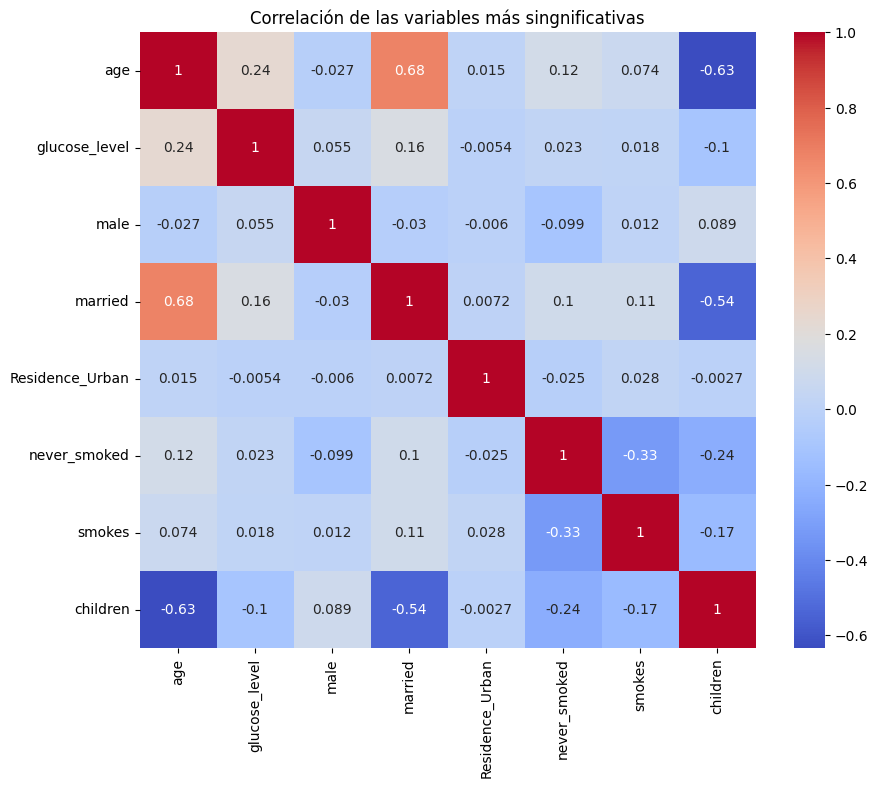

In [46]:
used_features = X_train_resampled_s.columns[elegidas]
 
colormap = plt.cm.coolwarm

plt.figure(figsize=(10,8))

plt.title('Correlación de las variables más singnificativas')
sns.heatmap(HospitalData_dfcopy[used_features].astype(float).corr(), square=True, cmap=colormap, linecolor='white', annot=True)

# Código base tomado de: https://github.com/topics/gaussian-naive-bayes-implementation


In [47]:
# iniciamos el clasificador
gnb = GaussianNB()

# se entrena el clasificador
gnb.fit(X_train[used_features].values, y_train)
y_pred = gnb.predict(X_test[used_features])
 
print('Precisión en el set de Entrenamiento: {:.2f}'.format(gnb.score(X_train[used_features], y_train)))
print('Precisión en el set de Test: {:.2f}'.format(gnb.score(X_test[used_features], y_test)))

# Código base tomado de: https://github.com/topics/gaussian-naive-bayes-implementation

Precisión en el set de Entrenamiento: 0.83
Precisión en el set de Test: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [48]:
# se prueba el modelo siendo no tiene un ataque [0] y si tiene un ataque [1]

#                 ['age', 'glucose_level', 'male', 'married', 'Residence_Urban', 'never_smoked', 'smokes', 'children']

predicciones = gnb.predict([[67.0, 228.69, 1, 1, 1, 0, 0, 0],[75.0, 75.39, 0, 1, 0, 1, 0, 0]])

print(f"La primera persona {'tendrá' if predicciones[0] == 1 else 'no tendrá'} un ataque cerebral.")
print(f"La segunda persona {'tendrá' if predicciones[1] == 1 else 'no tendrá'} un ataque cerebral.")


# Código base tomado de: https://github.com/topics/gaussian-naive-bayes-implementation



La primera persona tendrá un ataque cerebral.
La segunda persona no tendrá un ataque cerebral.


In [49]:
#Vemos el resultado del registro 0 y 397, se compara con el resultado anterior la columna stroke
HospitalData_dfcopy.head(400)

,age,glucose_level,bmi,male,heart_disease,hypertension,married,Residence_Urban,formerly_smoked,never_smoked,smokes,Stroke,never_worked,Work_Private,self_employed,children
0,67.0,228.69,36.6,1,1,0,1,1,1,0,0,1,0,1,0,0
1,61.0,202.21,28.1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,80.0,105.92,32.5,1,1,0,1,0,0,1,0,1,0,1,0,0
3,49.0,171.23,34.4,0,0,0,1,1,0,0,1,1,0,1,0,0
4,79.0,174.12,24.0,0,0,1,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,75.0,75.39,37.8,0,0,0,1,0,0,1,0,0,0,0,1,0
398,31.0,122.41,40.3,0,0,0,1,0,0,0,1,0,0,1,0,0
399,58.0,223.36,41.5,1,0,1,1,0,1,0,0,0,0,1,0,0
400,5.0,84.59,17.7,0,0,0,0,0,0,0,0,0,0,0,0,1


### 5.3 - Para al menos 2 algoritmos utilice un método de optimización de hiperparámetros.

#### Decision Tree 

In [50]:
# se utilizará Decision Tree para la predicción usando la base que da el mejor resultado

# se importan las librerias necesarias
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# Train the model on the training data
dt.fit(X_train_resampled_s, y_train_resampled_s)

# Make predictions on the testing data
y_pred_s = dt.predict(X_test)

# Print the accuracy of the model
print('Al realizar Decision Tree se tiene una precisión de:', dt.score(X_test, y_test))

# Código base tomado de: https://github.com/topics/decision-tree

Al realizar Decision Tree se tiene una precisión de: 0.7598039215686274


#### Decision Tree con Hiperparametros

In [51]:
#Se importan las librerias necesarias
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3]
}

# Crear una instancia del clasificador de árbol de decisiones
dt = DecisionTreeClassifier()

# Crear una instancia del objeto GridSearchCV
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 5)

# Ajustar el modelo utilizando GridSearchCV
grid_search.fit(X_train_resampled_s, y_train_resampled_s)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

# Crear una nueva instancia del clasificador de árbol de decisiones con los mejores hiperparámetros
dt_best = DecisionTreeClassifier(**best_params)

# Entrenar el modelo con los mejores hiperparámetros
dt_best.fit(X_train_resampled_s, y_train_resampled_s)

# Realizar predicciones en los datos de prueba
y_pred_s = dt_best.predict(X_test)

# Imprimir la precisión del modelo con los mejores hiperparámetros
print('Al realizar Decision Tree con los mejores hiperparámetros se tiene una precisión de:', dt_best.score(X_test, y_test))


Al realizar Decision Tree con los mejores hiperparámetros se tiene una precisión de: 0.8509803921568627


#### Gradient Boosting Classifier

In [52]:
# Este código importa los módulos necesarios de la biblioteca scikit-learn para la clasificación Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

#Esta línea crea una nueva instancia de la clase GradientBoostingClassifier con un estado aleatorio establecido en 0. 
gbc = GradientBoostingClassifier(random_state = 42)

# Esta línea entrena el clasificador Gradient Boosting en los datos de entrenamiento remuestreados X_train_resampled_ro y y_train_resampled_ro. El método fit() ajusta los parámetros del modelo para minimizar la pérdida del conjunto de entrenamiento.
gbc.fit(X_train_resampled_s, y_train_resampled_s)

# Esta línea evalúa la precisión del modelo entrenado en los datos de prueba X_prueba e y_prueba. El método score() calcula la precisión media de las predicciones realizadas por el modelo en los datos de prueba.
score = gbc.score(X_test, y_test)

# Esta línea muestra la precisión del modelo entrenado en los datos de prueba. La precisión se muestra como un número de coma flotante con dos decimales.
print('Al realizar Gradient Boosting Classifier se tiene una precisión de:', score)

Al realizar Gradient Boosting Classifier se tiene una precisión de: 0.8627450980392157


In [82]:
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros que deseas ajustar y sus posibles valores
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Crear una nueva instancia del clasificador GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)

# Crear una instancia de GridSearchCV con el clasificador y la grilla de hiperparámetros
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5)

# Realizar la búsqueda en cuadrícula en los datos de entrenamiento
grid_search.fit(X_train_resampled_s, y_train_resampled_s)

# Obtener la mejor combinación de hiperparámetros encontrada
best_params = grid_search.best_params_

# Entrenar el modelo con los mejores hiperparámetros encontrados
best_model = GradientBoostingClassifier(random_state=0, **best_params)
best_model.fit(X_train_resampled_s, y_train_resampled_s)

# Evaluar la precisión del modelo entrenado en los datos de prueba
score = best_model.score(X_test, y_test)

# Mostrar la precisión del modelo
print('Al realizar Gradient Boosting Classifier con los mejores hiperparámetros se tiene una precisión de:', score)

Al realizar Gradient Boosting Classifier con los mejores hiperparámetros se tiene una precisión de: 0.9107843137254902


### 5.4 - Para los hiperparamétros no optimizados de todos los modelos, justifique su valor

#### **Random Forest**
Random_state se utiliza para establecer la semilla para el generador aleatorio para que podamos asegurarnos de que los resultados que obtenemos se pueden reproducir. Debido a la naturaleza de la división de los datos en tren y prueba es aleatoria obtendría diferentes datos asignados a los datos de tren y prueba a menos que pueda controlar el factor aleatorio. Con base a un "inside joke" se utiliza el valor 42 para random_state.

Referencia:
Sahagian, G.R. (202). What is Random State 42? Medium. Recuperado de https://grsahagian.medium.com/what-is-random-state-42-d803402ee76b#:~:text=The%20number%2042%20is%20sort,over%20the%20period%20of%207.5


#### **n_estimators**
De acuerdo con el manual de scikit-learn, n_estimators debe ser lo suficientemente grande para que la métrica de error se asiente, pero no tan grande que se convierta en inviable computacionalmente. La validación cruzada o la búsqueda en la cuadrícula se pueden utilizar para encontrar el mejor valor para n_estimators.

Referencias:
"Random Forests" by Leo Breiman in Machine Learning, Volume 45, Issue 1, pp 5–32 (2001).

"Random Forests for Regression and Classification" by Andy Liaw et al. in The R Journal, Volume 2/3, pp 18–22 (2010).

"On parameters tuning of Random Forest on genomic data" by Paola Sebastiani et al. in Scientific Reports, Volume 7, Article number 43832 (2017).

#### **parametro k**
El hiperparámetro k denota el suavizado de Laplace o, más ampliamente, el método de adición de Laplace. El suavizado de Laplace se utiliza para evitar la probabilidad cero y suele ser necesario cuando los datos de entrenamiento son insuficientes. k es una constante de suavizado que se multiplica por el número de apariciones de cada palabra en cada clase. Su objetivo es ajustar las probabilidades estimadas para evitar dar probabilidad cero a términos que no aparecen en los textos de la clase de formación.

Referencias:
Zhang, H., & Yu, L. (2004). Naive Bayes classification: Beyond independence assumption. In IJCAI (Vol. 4, pp. 1357-1362)

## 6 - Evalue cada modelo

### 6.1 - Calcule la matriz de confusión, exactitud, sensibilidad, especificidad, precisión, AUC y curva ROC para cada algoritmo en el set de entrenamiento, validación y prueba

### Random Forest

#### Set de Entrenamiento

<ipython-input-35-a2ab39f6846b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 2)


<Figure size 400x400 with 0 Axes>

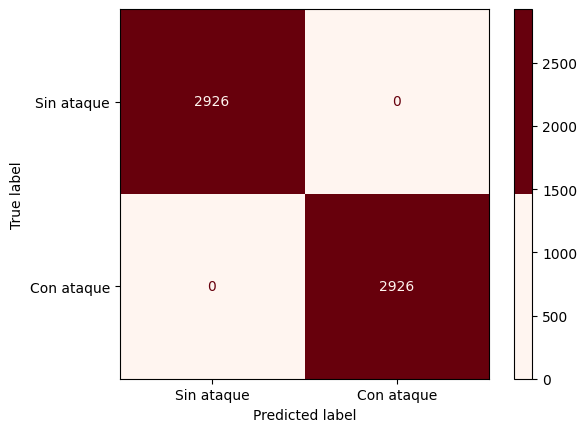

tn 2926 fp 0
fn 0 tp 2926
Sensitivity / Recall / TPR: 1.0
Specificity / selectivity / TNR: 1.0
Fallout / FPR: 1.0
Precision / Positive predicted value: 0.0
El valor AUC es:  0.8307943221736325


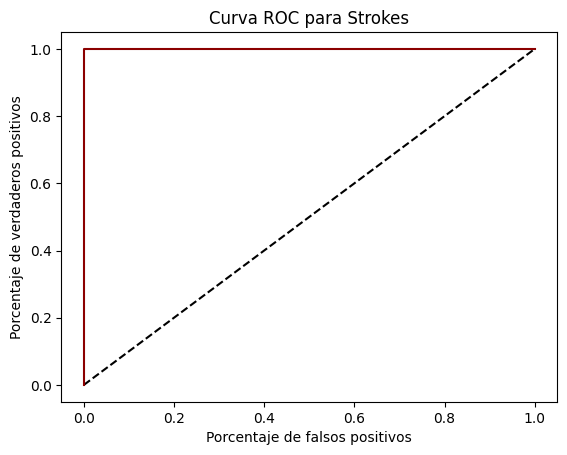

[[2926    0]
 [   0 2926]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2926
           1       1.00      1.00      1.00      2926

    accuracy                           1.00      5852
   macro avg       1.00      1.00      1.00      5852
weighted avg       1.00      1.00      1.00      5852



In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve

# se inicializa el modelo
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model on the training data
rf.fit(X_train_resampled_s, y_train_resampled_s)

# Make predictions on the train data
y_pred_rf = rf.predict(X_train_resampled_s)

# Calculate the confusion matrix para el modelo entrenado con Random Forest
plot_confusion_matrix(y_train_resampled_s, y_pred_rf, ['Sin ataque', 'Con ataque'])

y_pred_probs_rf = rf.predict_proba(X_train_resampled_s)[:, 1]

auc_rf = roc_auc_score(y_train_resampled_s, y_pred_probs_rf)
print('El valor AUC es: ',auc)


# se genera la curva ROC
fpr, tpr, thresholds = roc_curve(y_train_resampled_s, y_pred_probs_rf)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr, color = "darkred")
plt.xlabel('Porcentaje de falsos positivos')
plt.ylabel('Porcentaje de verdaderos positivos')
plt.title('Curva ROC para Strokes')
plt.show()

print(confusion_matrix(y_train_resampled_s, y_pred_rf))
print(classification_report(y_train_resampled_s, y_pred_rf))

In [55]:
# Calcula la exactitud
exactitud = accuracy_score(y_train_resampled_s, y_pred_rf)

# Calcula la precisión
precision = precision_score(y_train_resampled_s, y_pred_rf, pos_label = 1)
precision_non = precision_score(y_train_resampled_s, y_pred_rf, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_train_resampled_s, y_pred_rf, pos_label = 1)
sensibilidad_non = recall_score(y_train_resampled_s, y_pred_rf, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_train_resampled_s, y_pred_rf, pos_label = 1)
especificidad_non = recall_score(y_train_resampled_s, y_pred_rf, pos_label = 0)

# Imprime los resultados
print("\nExactitud: {:.2%}".format(exactitud))
print("\nPrecisión para la clase 'stroke': {:.2%}".format(precision))
print("\nPrecisión para la clase 'nonstroke': {:.2%}".format(precision_non))
print("\nSensibilidad para la clase 'stroke': {:.2%}".format(sensibilidad))
print("\nSensibilidad para la clase 'nonstroke': {:.2%}".format(sensibilidad_non))
print("\nEspecificidad para la clase 'stroke': {:.2%}".format(especificidad))
print("\nEspecificidad para la clase 'nonstroke': {:.2%}".format(especificidad_non))


Exactitud: 100.00%

Precisión para la clase 'stroke': 100.00%

Precisión para la clase 'nonstroke': 100.00%

Sensibilidad para la clase 'stroke': 100.00%

Sensibilidad para la clase 'nonstroke': 100.00%

Especificidad para la clase 'stroke': 100.00%

Especificidad para la clase 'nonstroke': 100.00%


#### Set de Prueba

<ipython-input-35-a2ab39f6846b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 2)


<Figure size 400x400 with 0 Axes>

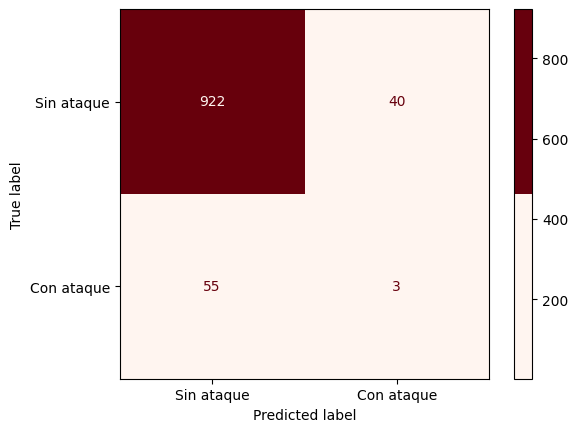

tn 922 fp 40
fn 55 tp 3
Sensitivity / Recall / TPR: 0.05172413793103448
Specificity / selectivity / TNR: 0.9584199584199584
Fallout / FPR: 0.06976744186046512
Precision / Positive predicted value: 0.04158004158004158
El valor AUC es:  0.8307943221736325


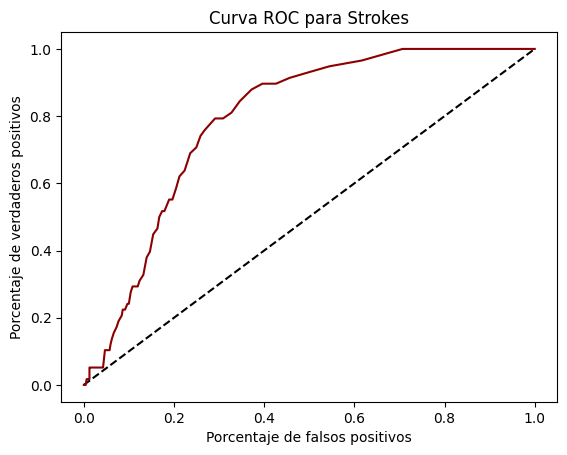

[[922  40]
 [ 55   3]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       962
           1       0.07      0.05      0.06        58

    accuracy                           0.91      1020
   macro avg       0.51      0.51      0.51      1020
weighted avg       0.89      0.91      0.90      1020



In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve

# se inicializa el modelo
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model on the training data
rf.fit(X_train_resampled_s, y_train_resampled_s)

# Make predictions on the train data
y_pred_rf = rf.predict(X_test)

# Calculate the confusion matrix para el modelo entrenado con Random Forest
plot_confusion_matrix(y_test, y_pred_rf, ['Sin ataque', 'Con ataque'])

y_pred_probs_rf = rf.predict_proba(X_test)[:, 1]

auc_rf = roc_auc_score(y_test, y_pred_probs_rf)
print('El valor AUC es: ',auc)


# se genera la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_rf)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr, color = "darkred")
plt.xlabel('Porcentaje de falsos positivos')
plt.ylabel('Porcentaje de verdaderos positivos')
plt.title('Curva ROC para Strokes')
plt.show()

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

In [57]:
# Calcula la exactitud
exactitud = accuracy_score(y_test, y_pred_rf)

# Calcula la precisión
precision = precision_score(y_test, y_pred_rf, pos_label = 1)
precision_non = precision_score(y_test, y_pred_rf, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_test, y_pred_rf, pos_label = 1)
sensibilidad_non = recall_score(y_test, y_pred_rf, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_test, y_pred_rf, pos_label = 1)
especificidad_non = recall_score(y_test, y_pred_rf, pos_label = 0)

# Imprime los resultados
print("\nExactitud: {:.2%}".format(exactitud))
print("\nPrecisión para la clase 'stroke': {:.2%}".format(precision))
print("\nPrecisión para la clase 'nonstroke': {:.2%}".format(precision_non))
print("\nSensibilidad para la clase 'stroke': {:.2%}".format(sensibilidad))
print("\nSensibilidad para la clase 'nonstroke': {:.2%}".format(sensibilidad_non))
print("\nEspecificidad para la clase 'stroke': {:.2%}".format(especificidad))
print("\nEspecificidad para la clase 'nonstroke': {:.2%}".format(especificidad_non))


Exactitud: 90.69%

Precisión para la clase 'stroke': 6.98%

Precisión para la clase 'nonstroke': 94.37%

Sensibilidad para la clase 'stroke': 5.17%

Sensibilidad para la clase 'nonstroke': 95.84%

Especificidad para la clase 'stroke': 5.17%

Especificidad para la clase 'nonstroke': 95.84%


#### Set de Validación

<ipython-input-35-a2ab39f6846b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 2)


<Figure size 400x400 with 0 Axes>

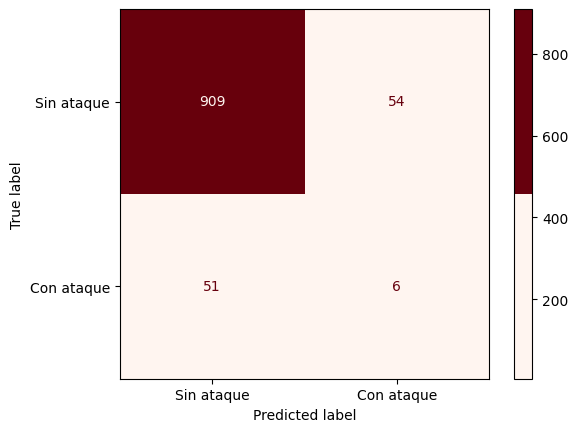

tn 909 fp 54
fn 51 tp 6
Sensitivity / Recall / TPR: 0.10526315789473684
Specificity / selectivity / TNR: 0.9439252336448598
Fallout / FPR: 0.1
Precision / Positive predicted value: 0.056074766355140186
El valor AUC es:  0.8307943221736325


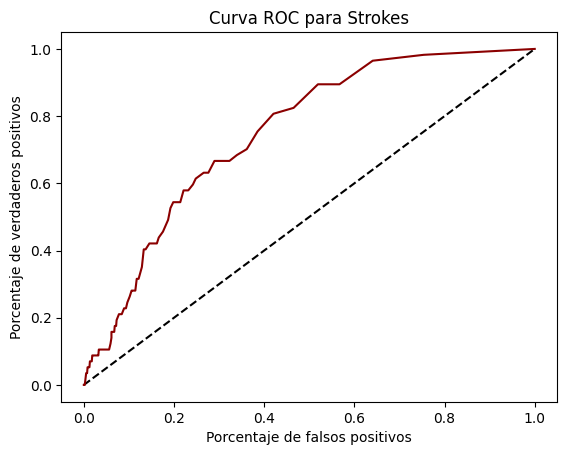

[[909  54]
 [ 51   6]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       963
           1       0.10      0.11      0.10        57

    accuracy                           0.90      1020
   macro avg       0.52      0.52      0.52      1020
weighted avg       0.90      0.90      0.90      1020



In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve

# se inicializa el modelo
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

# Train the model on the training data
rf.fit(X_train_resampled_s, y_train_resampled_s)

# Make predictions on the train data
y_pred_rf = rf.predict(X_val)

# Calculate the confusion matrix para el modelo entrenado con Random Forest
plot_confusion_matrix(y_val, y_pred_rf, ['Sin ataque', 'Con ataque'])

y_pred_probs_rf = rf.predict_proba(X_val)[:, 1]

auc_rf = roc_auc_score(y_val, y_pred_probs_rf)
print('El valor AUC es: ',auc)


# se genera la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs_rf)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr, color = "darkred")
plt.xlabel('Porcentaje de falsos positivos')
plt.ylabel('Porcentaje de verdaderos positivos')
plt.title('Curva ROC para Strokes')
plt.show()

print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

In [59]:
# Calcula la exactitud
exactitud = accuracy_score(y_val, y_pred_rf)

# Calcula la precisión
precision = precision_score(y_val, y_pred_rf, pos_label = 1)
precision_non = precision_score(y_val, y_pred_rf, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_val, y_pred_rf, pos_label = 1)
sensibilidad_non = recall_score(y_val, y_pred_rf, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_val, y_pred_rf, pos_label = 1)
especificidad_non = recall_score(y_val, y_pred_rf, pos_label = 0)

# Imprime los resultados
print("\nExactitud: {:.2%}".format(exactitud))
print("\nPrecisión para la clase 'stroke': {:.2%}".format(precision))
print("\nPrecisión para la clase 'nonstroke': {:.2%}".format(precision_non))
print("\nSensibilidad para la clase 'stroke': {:.2%}".format(sensibilidad))
print("\nSensibilidad para la clase 'nonstroke': {:.2%}".format(sensibilidad_non))
print("\nEspecificidad para la clase 'stroke': {:.2%}".format(especificidad))
print("\nEspecificidad para la clase 'nonstroke': {:.2%}".format(especificidad_non))


Exactitud: 89.71%

Precisión para la clase 'stroke': 10.00%

Precisión para la clase 'nonstroke': 94.69%

Sensibilidad para la clase 'stroke': 10.53%

Sensibilidad para la clase 'nonstroke': 94.39%

Especificidad para la clase 'stroke': 10.53%

Especificidad para la clase 'nonstroke': 94.39%


### Gaussian Naive Bayes

#### Set de Entrenamiento

<ipython-input-35-a2ab39f6846b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 2)


<Figure size 400x400 with 0 Axes>

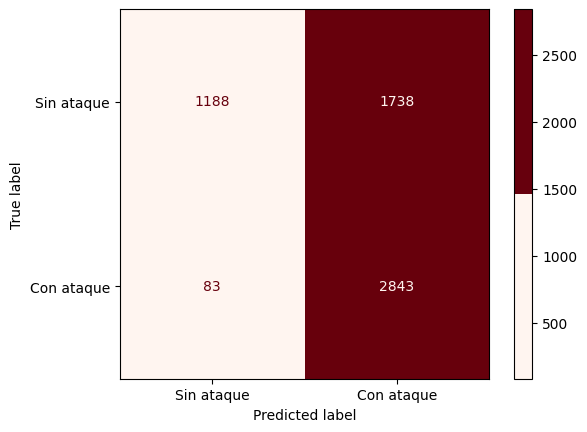

tn 1188 fp 1738
fn 83 tp 2843
Sensitivity / Recall / TPR: 0.9716336295283664
Specificity / selectivity / TNR: 0.40601503759398494
Fallout / FPR: 0.620606854398603
Precision / Positive predicted value: 0.5939849624060151
El valor AUC es:  0.8307943221736325


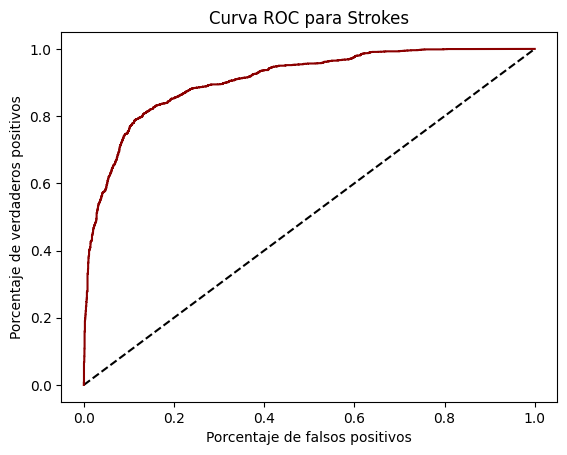

[[1188 1738]
 [  83 2843]]
              precision    recall  f1-score   support

           0       0.93      0.41      0.57      2926
           1       0.62      0.97      0.76      2926

    accuracy                           0.69      5852
   macro avg       0.78      0.69      0.66      5852
weighted avg       0.78      0.69      0.66      5852



In [60]:
# se importan las librerias necesarias
from sklearn.naive_bayes import GaussianNB

# iniciamos el clasificador
gnb = GaussianNB()

# se entrena el clasificador
gnb.fit(X_train_resampled_s, y_train_resampled_s)
y_pred_gnb = gnb.predict(X_train_resampled_s)

# Calculate the confusion matrix para el modelo entrenado con Random Forest
plot_confusion_matrix(y_train_resampled_s, y_pred_gnb, ['Sin ataque', 'Con ataque'])

y_pred_probs_gnb = gnb.predict_proba(X_train_resampled_s)[:, 1]

auc_gnb = roc_auc_score(y_train_resampled_s, y_pred_probs_gnb)
print('El valor AUC es: ',auc)


# se genera la curva ROC
fpr, tpr, thresholds = roc_curve(y_train_resampled_s, y_pred_probs_gnb)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr, color = "darkred")
plt.xlabel('Porcentaje de falsos positivos')
plt.ylabel('Porcentaje de verdaderos positivos')
plt.title('Curva ROC para Strokes')
plt.show()

print(confusion_matrix(y_train_resampled_s, y_pred_gnb))
print(classification_report(y_train_resampled_s, y_pred_gnb))

In [61]:
# Calcula la exactitud
exactitud = accuracy_score(y_train_resampled_s, y_pred_gnb)

# Calcula la precisión
precision = precision_score(y_train_resampled_s, y_pred_gnb, pos_label = 1)
precision_non = precision_score(y_train_resampled_s, y_pred_gnb, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_train_resampled_s, y_pred_gnb, pos_label = 1)
sensibilidad_non = recall_score(y_train_resampled_s, y_pred_gnb, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_train_resampled_s, y_pred_gnb, pos_label = 1)
especificidad_non = recall_score(y_train_resampled_s, y_pred_gnb, pos_label = 0)

# Imprime los resultados
print("\nExactitud: {:.2%}".format(exactitud))
print("\nPrecisión para la clase 'stroke': {:.2%}".format(precision))
print("\nPrecisión para la clase 'nonstroke': {:.2%}".format(precision_non))
print("\nSensibilidad para la clase 'stroke': {:.2%}".format(sensibilidad))
print("\nSensibilidad para la clase 'nonstroke': {:.2%}".format(sensibilidad_non))
print("\nEspecificidad para la clase 'stroke': {:.2%}".format(especificidad))
print("\nEspecificidad para la clase 'nonstroke': {:.2%}".format(especificidad_non))


Exactitud: 68.88%

Precisión para la clase 'stroke': 62.06%

Precisión para la clase 'nonstroke': 93.47%

Sensibilidad para la clase 'stroke': 97.16%

Sensibilidad para la clase 'nonstroke': 40.60%

Especificidad para la clase 'stroke': 97.16%

Especificidad para la clase 'nonstroke': 40.60%


#### Set de Prueba

<ipython-input-35-a2ab39f6846b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 2)


<Figure size 400x400 with 0 Axes>

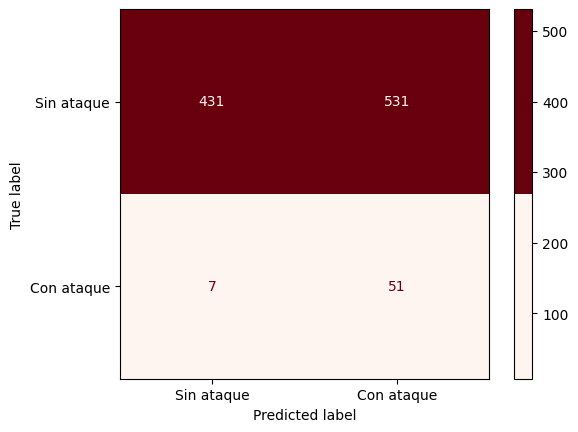

tn 431 fp 531
fn 7 tp 51
Sensitivity / Recall / TPR: 0.8793103448275862
Specificity / selectivity / TNR: 0.448024948024948
Fallout / FPR: 0.08762886597938144
Precision / Positive predicted value: 0.5519750519750519
El valor AUC es:  0.8307943221736325


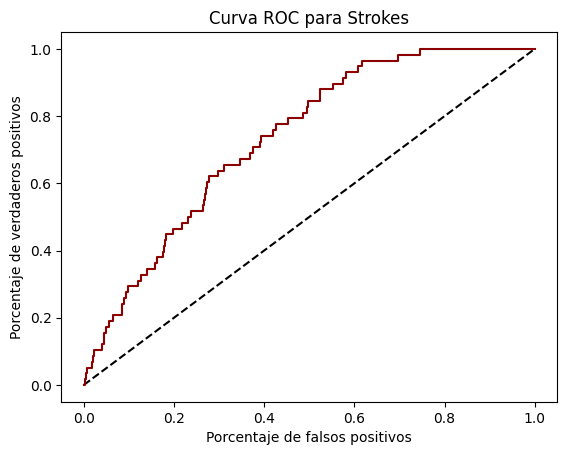

[[431 531]
 [  7  51]]
              precision    recall  f1-score   support

           0       0.98      0.45      0.62       962
           1       0.09      0.88      0.16        58

    accuracy                           0.47      1020
   macro avg       0.54      0.66      0.39      1020
weighted avg       0.93      0.47      0.59      1020



In [62]:
# se importan las librerias necesarias
from sklearn.naive_bayes import GaussianNB

# iniciamos el clasificador
gnb = GaussianNB()

# se entrena el clasificador
gnb.fit(X_train_resampled_s, y_train_resampled_s)

y_pred_gnb = gnb.predict(X_test)

# Calculate the confusion matrix para el modelo entrenado con Random Forest
plot_confusion_matrix(y_test, y_pred_gnb, ['Sin ataque', 'Con ataque'])

y_pred_probs_gnb = gnb.predict_proba(X_test)[:, 1]

auc_gnb = roc_auc_score(y_test, y_pred_probs_gnb)
print('El valor AUC es: ',auc)


# se genera la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_gnb)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr, color = "darkred")
plt.xlabel('Porcentaje de falsos positivos')
plt.ylabel('Porcentaje de verdaderos positivos')
plt.title('Curva ROC para Strokes')
plt.show()

print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))

In [63]:
# Calcula la exactitud
exactitud = accuracy_score(y_test, y_pred_gnb)

# Calcula la precisión
precision = precision_score(y_test, y_pred_gnb, pos_label = 1)
precision_non = precision_score(y_test, y_pred_gnb, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_test, y_pred_gnb, pos_label = 1)
sensibilidad_non = recall_score(y_test, y_pred_gnb, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_test, y_pred_gnb, pos_label = 1)
especificidad_non = recall_score(y_test, y_pred_gnb, pos_label = 0)

# Imprime los resultados
print("\nExactitud: {:.2%}".format(exactitud))
print("\nPrecisión para la clase 'stroke': {:.2%}".format(precision))
print("\nPrecisión para la clase 'nonstroke': {:.2%}".format(precision_non))
print("\nSensibilidad para la clase 'stroke': {:.2%}".format(sensibilidad))
print("\nSensibilidad para la clase 'nonstroke': {:.2%}".format(sensibilidad_non))
print("\nEspecificidad para la clase 'stroke': {:.2%}".format(especificidad))
print("\nEspecificidad para la clase 'nonstroke': {:.2%}".format(especificidad_non))


Exactitud: 47.25%

Precisión para la clase 'stroke': 8.76%

Precisión para la clase 'nonstroke': 98.40%

Sensibilidad para la clase 'stroke': 87.93%

Sensibilidad para la clase 'nonstroke': 44.80%

Especificidad para la clase 'stroke': 87.93%

Especificidad para la clase 'nonstroke': 44.80%


#### Set de Validación

<ipython-input-35-a2ab39f6846b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 2)


<Figure size 400x400 with 0 Axes>

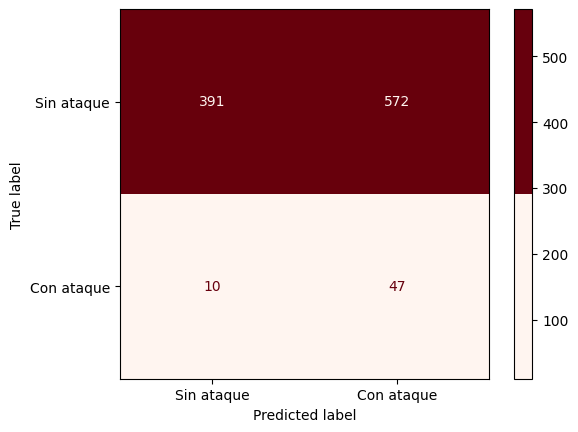

tn 391 fp 572
fn 10 tp 47
Sensitivity / Recall / TPR: 0.8245614035087719
Specificity / selectivity / TNR: 0.40602284527518173
Fallout / FPR: 0.07592891760904685
Precision / Positive predicted value: 0.5939771547248183
El valor AUC es:  0.8307943221736325


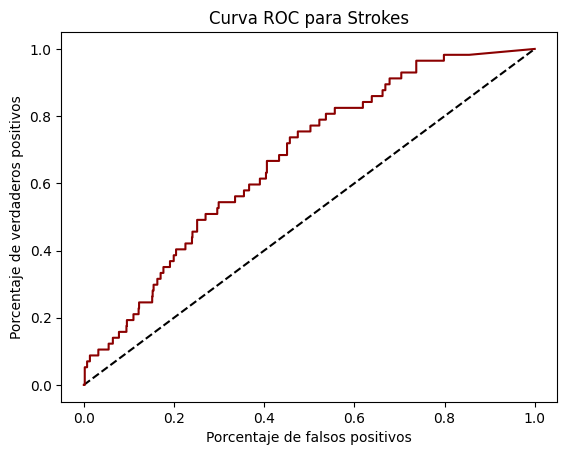

[[391 572]
 [ 10  47]]
              precision    recall  f1-score   support

           0       0.98      0.41      0.57       963
           1       0.08      0.82      0.14        57

    accuracy                           0.43      1020
   macro avg       0.53      0.62      0.36      1020
weighted avg       0.92      0.43      0.55      1020



In [64]:
# se importan las librerias necesarias
from sklearn.naive_bayes import GaussianNB

# iniciamos el clasificador
gnb = GaussianNB()

# se entrena el clasificador
gnb.fit(X_train_resampled_s, y_train_resampled_s)

y_pred_gnb = gnb.predict(X_val)

# Calculate the confusion matrix para el modelo entrenado con Random Forest
plot_confusion_matrix(y_val, y_pred_gnb, ['Sin ataque', 'Con ataque'])

y_pred_probs_gnb = gnb.predict_proba(X_val)[:, 1]

auc_gnb = roc_auc_score(y_val, y_pred_probs_gnb)
print('El valor AUC es: ',auc)


# se genera la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs_gnb)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr, color = "darkred")
plt.xlabel('Porcentaje de falsos positivos')
plt.ylabel('Porcentaje de verdaderos positivos')
plt.title('Curva ROC para Strokes')
plt.show()

print(confusion_matrix(y_val, y_pred_gnb))
print(classification_report(y_val, y_pred_gnb))

In [65]:
# Calcula la exactitud
exactitud = accuracy_score(y_val, y_pred_gnb)

# Calcula la precisión
precision = precision_score(y_val, y_pred_gnb, pos_label = 1)
precision_non = precision_score(y_val, y_pred_gnb, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_val, y_pred_gnb, pos_label = 1)
sensibilidad_non = recall_score(y_val, y_pred_gnb, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_val, y_pred_gnb, pos_label = 1)
especificidad_non = recall_score(y_val, y_pred_gnb, pos_label = 0)

# Imprime los resultados
print("\nExactitud: {:.2%}".format(exactitud))
print("\nPrecisión para la clase 'stroke': {:.2%}".format(precision))
print("\nPrecisión para la clase 'nonstroke': {:.2%}".format(precision_non))
print("\nSensibilidad para la clase 'stroke': {:.2%}".format(sensibilidad))
print("\nSensibilidad para la clase 'nonstroke': {:.2%}".format(sensibilidad_non))
print("\nEspecificidad para la clase 'stroke': {:.2%}".format(especificidad))
print("\nEspecificidad para la clase 'nonstroke': {:.2%}".format(especificidad_non))


Exactitud: 42.94%

Precisión para la clase 'stroke': 7.59%

Precisión para la clase 'nonstroke': 97.51%

Sensibilidad para la clase 'stroke': 82.46%

Sensibilidad para la clase 'nonstroke': 40.60%

Especificidad para la clase 'stroke': 82.46%

Especificidad para la clase 'nonstroke': 40.60%


### Arbol de Decisión

#### Set de Entrenamiento

<ipython-input-35-a2ab39f6846b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 2)


<Figure size 400x400 with 0 Axes>

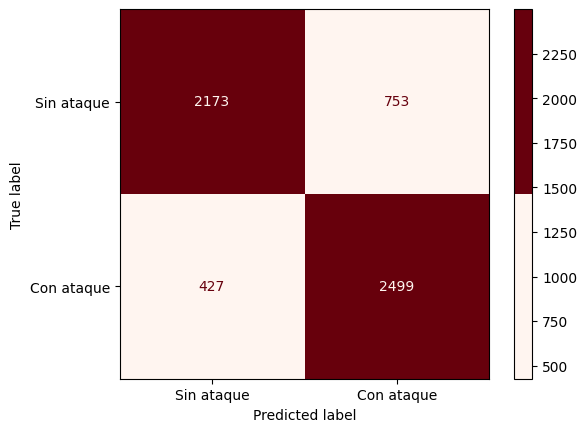

tn 2173 fp 753
fn 427 tp 2499
Sensitivity / Recall / TPR: 0.854066985645933
Specificity / selectivity / TNR: 0.7426520847573479
Fallout / FPR: 0.768450184501845
Precision / Positive predicted value: 0.2573479152426521
El valor AUC es:  0.8728290542425162


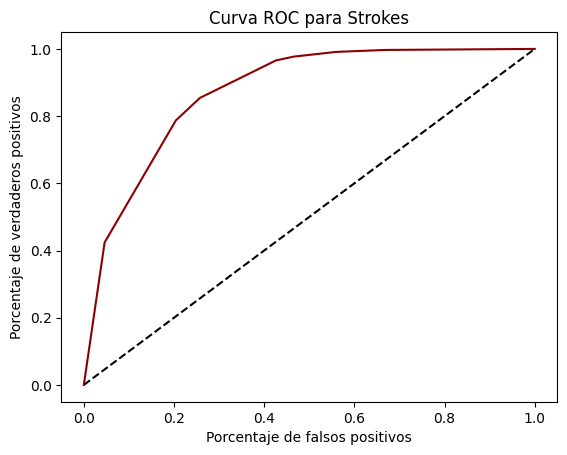

[[2173  753]
 [ 427 2499]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2926
           1       0.77      0.85      0.81      2926

    accuracy                           0.80      5852
   macro avg       0.80      0.80      0.80      5852
weighted avg       0.80      0.80      0.80      5852



In [66]:
# se importan las librerias necesarias
from sklearn.tree import DecisionTreeClassifier

ad = DecisionTreeClassifier(max_depth = 3)

# Train the model on the training data
ad.fit(X_train_resampled_s, y_train_resampled_s)

# Make predictions on the testing data
y_pred_ad = ad.predict(X_train_resampled_s)

# Calculate the confusion matrix para el modelo entrenado con Random Forest
plot_confusion_matrix(y_train_resampled_s, y_pred_ad, ['Sin ataque', 'Con ataque'])

y_pred_probs_ad = ad.predict_proba(X_train_resampled_s)[:, 1]

auc_ad = roc_auc_score(y_train_resampled_s, y_pred_probs_ad)
print('El valor AUC es: ', auc_ad)


# se genera la curva ROC
fpr, tpr, thresholds = roc_curve(y_train_resampled_s, y_pred_probs_ad)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr, color = "darkred")
plt.xlabel('Porcentaje de falsos positivos')
plt.ylabel('Porcentaje de verdaderos positivos')
plt.title('Curva ROC para Strokes')
plt.show()

print(confusion_matrix(y_train_resampled_s, y_pred_ad))
print(classification_report(y_train_resampled_s, y_pred_ad))

In [67]:
# Calcula la exactitud
exactitud = accuracy_score(y_train_resampled_s, y_pred_ad)

# Calcula la precisión
precision = precision_score(y_train_resampled_s, y_pred_ad, pos_label = 1)
precision_non = precision_score(y_train_resampled_s, y_pred_ad, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_train_resampled_s, y_pred_ad, pos_label = 1)
sensibilidad_non = recall_score(y_train_resampled_s, y_pred_ad, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_train_resampled_s, y_pred_ad, pos_label = 1)
especificidad_non = recall_score(y_train_resampled_s, y_pred_ad, pos_label = 0)

# Imprime los resultados
print("\nExactitud: {:.2%}".format(exactitud))
print("\nPrecisión para la clase 'stroke': {:.2%}".format(precision))
print("\nPrecisión para la clase 'nonstroke': {:.2%}".format(precision_non))
print("\nSensibilidad para la clase 'stroke': {:.2%}".format(sensibilidad))
print("\nSensibilidad para la clase 'nonstroke': {:.2%}".format(sensibilidad_non))
print("\nEspecificidad para la clase 'stroke': {:.2%}".format(especificidad))
print("\nEspecificidad para la clase 'nonstroke': {:.2%}".format(especificidad_non))


Exactitud: 79.84%

Precisión para la clase 'stroke': 76.85%

Precisión para la clase 'nonstroke': 83.58%

Sensibilidad para la clase 'stroke': 85.41%

Sensibilidad para la clase 'nonstroke': 74.27%

Especificidad para la clase 'stroke': 85.41%

Especificidad para la clase 'nonstroke': 74.27%


#### Set de Prueba

<ipython-input-35-a2ab39f6846b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 2)


<Figure size 400x400 with 0 Axes>

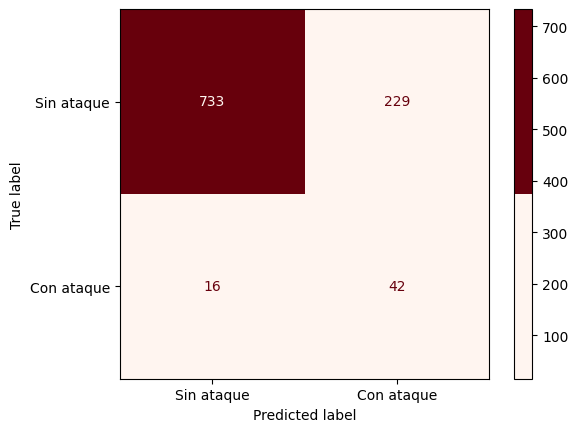

tn 733 fp 229
fn 16 tp 42
Sensitivity / Recall / TPR: 0.7241379310344828
Specificity / selectivity / TNR: 0.761954261954262
Fallout / FPR: 0.15498154981549817
Precision / Positive predicted value: 0.23804573804573806
El valor AUC es:  0.7992060362750018


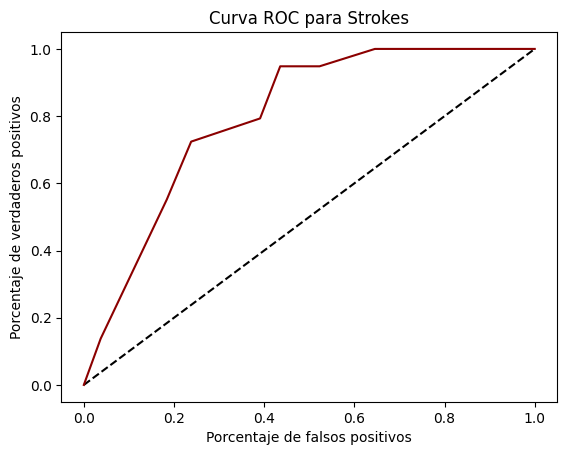

[[733 229]
 [ 16  42]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       962
           1       0.15      0.72      0.26        58

    accuracy                           0.76      1020
   macro avg       0.57      0.74      0.56      1020
weighted avg       0.93      0.76      0.82      1020



In [68]:
# se importan las librerias necesarias
from sklearn.tree import DecisionTreeClassifier

ad = DecisionTreeClassifier(max_depth = 3)

# Train the model on the training data
ad.fit(X_train_resampled_s, y_train_resampled_s)

# Make predictions on the testing data
y_pred_ad = ad.predict(X_test)

# Calculate the confusion matrix para el modelo entrenado con Random Forest
plot_confusion_matrix(y_test, y_pred_ad, ['Sin ataque', 'Con ataque'])

y_pred_probs_ad = ad.predict_proba(X_test)[:, 1]

auc_ad = roc_auc_score(y_test, y_pred_probs_ad)
print('El valor AUC es: ', auc_ad)


# se genera la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_ad)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr, color = "darkred")
plt.xlabel('Porcentaje de falsos positivos')
plt.ylabel('Porcentaje de verdaderos positivos')
plt.title('Curva ROC para Strokes')
plt.show()

print(confusion_matrix(y_test, y_pred_ad))
print(classification_report(y_test, y_pred_ad))

In [69]:
# Calcula la exactitud
exactitud = accuracy_score(y_test, y_pred_ad)

# Calcula la precisión
precision = precision_score(y_test, y_pred_ad, pos_label = 1)
precision_non = precision_score(y_test, y_pred_ad, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_test, y_pred_ad, pos_label = 1)
sensibilidad_non = recall_score(y_test, y_pred_ad, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_test, y_pred_ad, pos_label = 1)
especificidad_non = recall_score(y_test, y_pred_ad, pos_label = 0)

# Imprime los resultados
print("\nExactitud: {:.2%}".format(exactitud))
print("\nPrecisión para la clase 'stroke': {:.2%}".format(precision))
print("\nPrecisión para la clase 'nonstroke': {:.2%}".format(precision_non))
print("\nSensibilidad para la clase 'stroke': {:.2%}".format(sensibilidad))
print("\nSensibilidad para la clase 'nonstroke': {:.2%}".format(sensibilidad_non))
print("\nEspecificidad para la clase 'stroke': {:.2%}".format(especificidad))
print("\nEspecificidad para la clase 'nonstroke': {:.2%}".format(especificidad_non))


Exactitud: 75.98%

Precisión para la clase 'stroke': 15.50%

Precisión para la clase 'nonstroke': 97.86%

Sensibilidad para la clase 'stroke': 72.41%

Sensibilidad para la clase 'nonstroke': 76.20%

Especificidad para la clase 'stroke': 72.41%

Especificidad para la clase 'nonstroke': 76.20%


#### Set de Validación

<ipython-input-35-a2ab39f6846b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 2)


<Figure size 400x400 with 0 Axes>

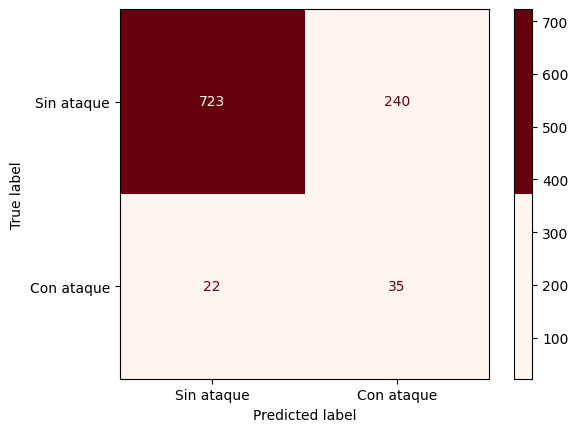

tn 723 fp 240
fn 22 tp 35
Sensitivity / Recall / TPR: 0.6140350877192983
Specificity / selectivity / TNR: 0.7507788161993769
Fallout / FPR: 0.12727272727272726
Precision / Positive predicted value: 0.24922118380062305
El valor AUC es:  0.7606529303528811


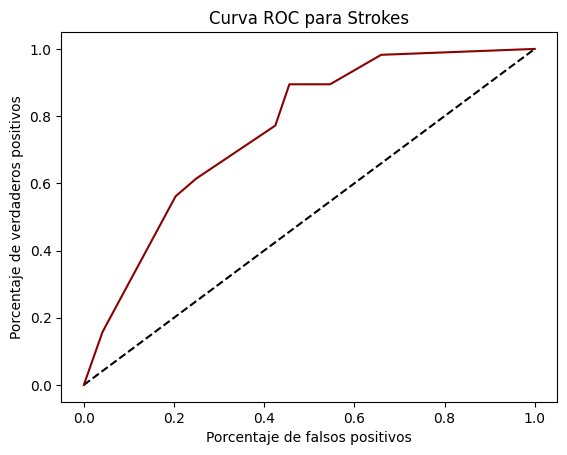

[[723 240]
 [ 22  35]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       963
           1       0.13      0.61      0.21        57

    accuracy                           0.74      1020
   macro avg       0.55      0.68      0.53      1020
weighted avg       0.92      0.74      0.81      1020



In [70]:
# se importan las librerias necesarias
from sklearn.tree import DecisionTreeClassifier

ad = DecisionTreeClassifier(max_depth = 3)

# Train the model on the training data
ad.fit(X_train_resampled_s, y_train_resampled_s)

# Make predictions on the testing data
y_pred_ad = ad.predict(X_val)

# Calculate the confusion matrix para el modelo entrenado con Random Forest
plot_confusion_matrix(y_val, y_pred_ad, ['Sin ataque', 'Con ataque'])

y_pred_probs_ad = ad.predict_proba(X_val)[:, 1]

auc_ad = roc_auc_score(y_val, y_pred_probs_ad)
print('El valor AUC es: ', auc_ad)


# se genera la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs_ad)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr, color = "darkred")
plt.xlabel('Porcentaje de falsos positivos')
plt.ylabel('Porcentaje de verdaderos positivos')
plt.title('Curva ROC para Strokes')
plt.show()

print(confusion_matrix(y_val, y_pred_ad))
print(classification_report(y_val, y_pred_ad))

In [71]:
# Calcula la exactitud
exactitud = accuracy_score(y_val, y_pred_ad)

# Calcula la precisión
precision = precision_score(y_val, y_pred_ad, pos_label = 1)
precision_non = precision_score(y_val, y_pred_ad, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_val, y_pred_ad, pos_label = 1)
sensibilidad_non = recall_score(y_val, y_pred_ad, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_val, y_pred_ad, pos_label = 1)
especificidad_non = recall_score(y_val, y_pred_ad, pos_label = 0)

# Imprime los resultados
print("\nExactitud: {:.2%}".format(exactitud))
print("\nPrecisión para la clase 'stroke': {:.2%}".format(precision))
print("\nPrecisión para la clase 'nonstroke': {:.2%}".format(precision_non))
print("\nSensibilidad para la clase 'stroke': {:.2%}".format(sensibilidad))
print("\nSensibilidad para la clase 'nonstroke': {:.2%}".format(sensibilidad_non))
print("\nEspecificidad para la clase 'stroke': {:.2%}".format(especificidad))
print("\nEspecificidad para la clase 'nonstroke': {:.2%}".format(especificidad_non))


Exactitud: 74.31%

Precisión para la clase 'stroke': 12.73%

Precisión para la clase 'nonstroke': 97.05%

Sensibilidad para la clase 'stroke': 61.40%

Sensibilidad para la clase 'nonstroke': 75.08%

Especificidad para la clase 'stroke': 61.40%

Especificidad para la clase 'nonstroke': 75.08%


#### Gradient Boosting Classifier

#### Set de Entrenamiento

<ipython-input-35-a2ab39f6846b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 2)


<Figure size 400x400 with 0 Axes>

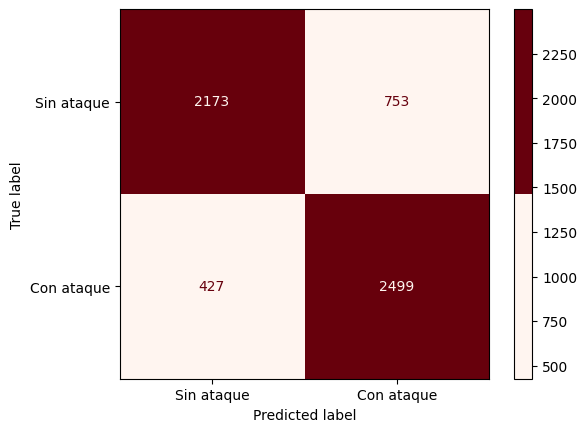

tn 2173 fp 753
fn 427 tp 2499
Sensitivity / Recall / TPR: 0.854066985645933
Specificity / selectivity / TNR: 0.7426520847573479
Fallout / FPR: 0.768450184501845
Precision / Positive predicted value: 0.2573479152426521
El valor AUC es:  0.9749842784118066


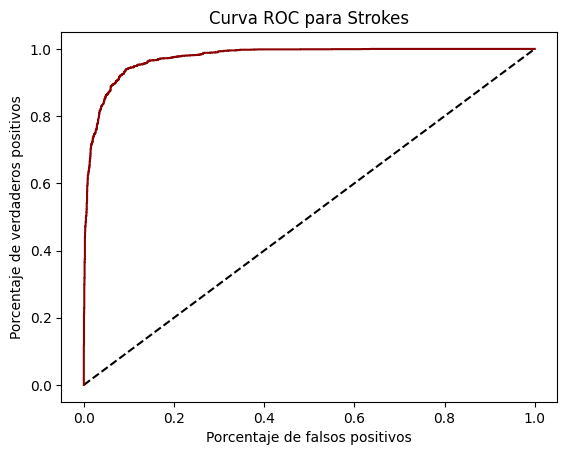

[[2173  753]
 [ 427 2499]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2926
           1       0.77      0.85      0.81      2926

    accuracy                           0.80      5852
   macro avg       0.80      0.80      0.80      5852
weighted avg       0.80      0.80      0.80      5852



In [72]:
# se importan las librerias necesarias
from sklearn.ensemble import GradientBoostingClassifier
#Esta línea crea una nueva instancia de la clase GradientBoostingClassifier con un estado aleatorio establecido en 0. 
gbc = GradientBoostingClassifier(random_state = 42)

# Esta línea entrena el clasificador Gradient Boosting en los datos de entrenamiento remuestreados X_train_resampled_ro y y_train_resampled_ro. El método fit() ajusta los parámetros del modelo para minimizar la pérdida del conjunto de entrenamiento.
gbc.fit(X_train_resampled_s, y_train_resampled_s)

# Make predictions on the testing data
y_pred_gbc = ad.predict(X_train_resampled_s)

# Calculate the confusion matrix para el modelo entrenado con Random Forest
plot_confusion_matrix(y_train_resampled_s, y_pred_gbc, ['Sin ataque', 'Con ataque'])

y_pred_probs_gbc = gbc.predict_proba(X_train_resampled_s)[:, 1]

auc_gbc = roc_auc_score(y_train_resampled_s, y_pred_probs_gbc)
print('El valor AUC es: ', auc_gbc)


# se genera la curva ROC
fpr, tpr, thresholds = roc_curve(y_train_resampled_s, y_pred_probs_gbc)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr, color = "darkred")
plt.xlabel('Porcentaje de falsos positivos')
plt.ylabel('Porcentaje de verdaderos positivos')
plt.title('Curva ROC para Strokes')
plt.show()

print(confusion_matrix(y_train_resampled_s, y_pred_gbc))
print(classification_report(y_train_resampled_s, y_pred_gbc))

In [73]:
# Calcula la exactitud
exactitud = accuracy_score(y_train_resampled_s, y_pred_gbc)

# Calcula la precisión
precision = precision_score(y_train_resampled_s, y_pred_gbc, pos_label = 1)
precision_non = precision_score(y_train_resampled_s, y_pred_gbc, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_train_resampled_s, y_pred_gbc, pos_label = 1)
sensibilidad_non = recall_score(y_train_resampled_s, y_pred_gbc, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_train_resampled_s, y_pred_gbc, pos_label = 1)
especificidad_non = recall_score(y_train_resampled_s, y_pred_gbc, pos_label = 0)

# Imprime los resultados
print("\nExactitud: {:.2%}".format(exactitud))
print("\nPrecisión para la clase 'stroke': {:.2%}".format(precision))
print("\nPrecisión para la clase 'nonstroke': {:.2%}".format(precision_non))
print("\nSensibilidad para la clase 'stroke': {:.2%}".format(sensibilidad))
print("\nSensibilidad para la clase 'nonstroke': {:.2%}".format(sensibilidad_non))
print("\nEspecificidad para la clase 'stroke': {:.2%}".format(especificidad))
print("\nEspecificidad para la clase 'nonstroke': {:.2%}".format(especificidad_non))


Exactitud: 79.84%

Precisión para la clase 'stroke': 76.85%

Precisión para la clase 'nonstroke': 83.58%

Sensibilidad para la clase 'stroke': 85.41%

Sensibilidad para la clase 'nonstroke': 74.27%

Especificidad para la clase 'stroke': 85.41%

Especificidad para la clase 'nonstroke': 74.27%


#### Set de Prueba

<ipython-input-35-a2ab39f6846b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 2)


<Figure size 400x400 with 0 Axes>

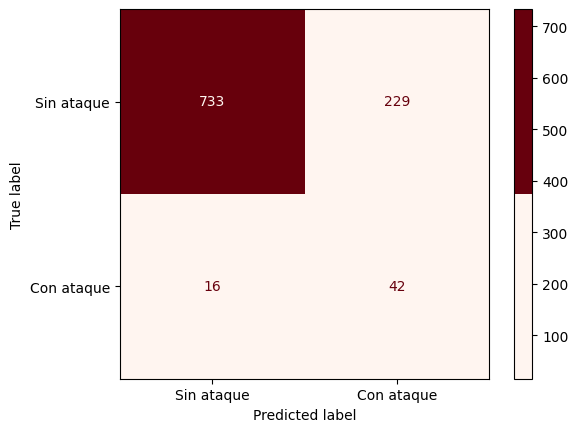

tn 733 fp 229
fn 16 tp 42
Sensitivity / Recall / TPR: 0.7241379310344828
Specificity / selectivity / TNR: 0.761954261954262
Fallout / FPR: 0.15498154981549817
Precision / Positive predicted value: 0.23804573804573806
El valor AUC es:  0.7818033550792172


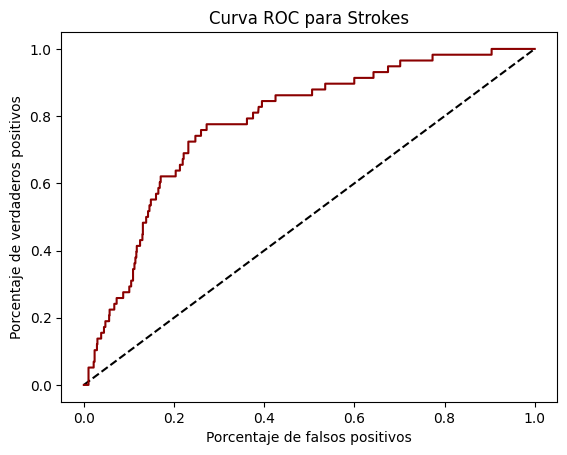

[[733 229]
 [ 16  42]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       962
           1       0.15      0.72      0.26        58

    accuracy                           0.76      1020
   macro avg       0.57      0.74      0.56      1020
weighted avg       0.93      0.76      0.82      1020



In [74]:
# se importan las librerias necesarias
from sklearn.ensemble import GradientBoostingClassifier
#Esta línea crea una nueva instancia de la clase GradientBoostingClassifier con un estado aleatorio establecido en 0. 
gbc = GradientBoostingClassifier(random_state = 42)

# Esta línea entrena el clasificador Gradient Boosting en los datos de entrenamiento remuestreados X_train_resampled_ro y y_train_resampled_ro. El método fit() ajusta los parámetros del modelo para minimizar la pérdida del conjunto de entrenamiento.
gbc.fit(X_train_resampled_s, y_train_resampled_s)

# Make predictions on the testing data
y_pred_gbc = ad.predict(X_test)

# Calculate the confusion matrix para el modelo entrenado con Random Forest
plot_confusion_matrix(y_test, y_pred_gbc, ['Sin ataque', 'Con ataque'])

y_pred_probs_gbc = gbc.predict_proba(X_test)[:, 1]

auc_gbc = roc_auc_score(y_test, y_pred_probs_gbc)
print('El valor AUC es: ', auc_gbc)


# se genera la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_gbc)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr, color = "darkred")
plt.xlabel('Porcentaje de falsos positivos')
plt.ylabel('Porcentaje de verdaderos positivos')
plt.title('Curva ROC para Strokes')
plt.show()

print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test, y_pred_gbc))

In [75]:
# Calcula la exactitud
exactitud = accuracy_score(y_test, y_pred_gbc)

# Calcula la precisión
precision = precision_score(y_test, y_pred_gbc, pos_label = 1)
precision_non = precision_score(y_test, y_pred_gbc, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_test, y_pred_gbc, pos_label = 1)
sensibilidad_non = recall_score(y_test, y_pred_gbc, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_test, y_pred_gbc, pos_label = 1)
especificidad_non = recall_score(y_test, y_pred_gbc, pos_label = 0)

# Imprime los resultados
print("\nExactitud: {:.2%}".format(exactitud))
print("\nPrecisión para la clase 'stroke': {:.2%}".format(precision))
print("\nPrecisión para la clase 'nonstroke': {:.2%}".format(precision_non))
print("\nSensibilidad para la clase 'stroke': {:.2%}".format(sensibilidad))
print("\nSensibilidad para la clase 'nonstroke': {:.2%}".format(sensibilidad_non))
print("\nEspecificidad para la clase 'stroke': {:.2%}".format(especificidad))
print("\nEspecificidad para la clase 'nonstroke': {:.2%}".format(especificidad_non))


Exactitud: 75.98%

Precisión para la clase 'stroke': 15.50%

Precisión para la clase 'nonstroke': 97.86%

Sensibilidad para la clase 'stroke': 72.41%

Sensibilidad para la clase 'nonstroke': 76.20%

Especificidad para la clase 'stroke': 72.41%

Especificidad para la clase 'nonstroke': 76.20%


#### Set de Validación

<ipython-input-35-a2ab39f6846b>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds', 2)


<Figure size 400x400 with 0 Axes>

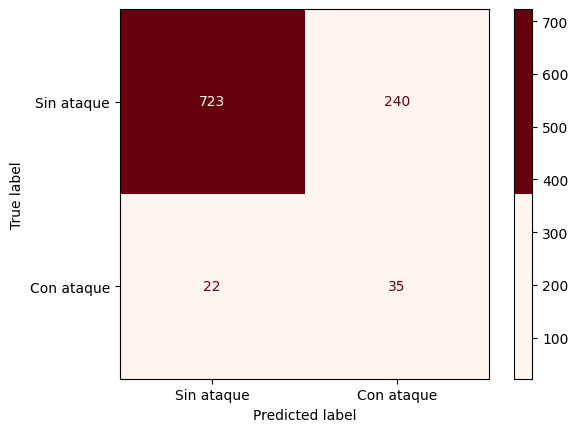

tn 723 fp 240
fn 22 tp 35
Sensitivity / Recall / TPR: 0.6140350877192983
Specificity / selectivity / TNR: 0.7507788161993769
Fallout / FPR: 0.12727272727272726
Precision / Positive predicted value: 0.24922118380062305
El valor AUC es:  0.7233061886283727


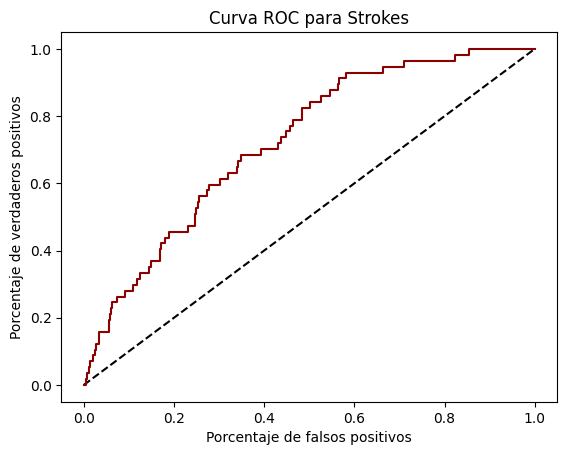

[[723 240]
 [ 22  35]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.85       963
           1       0.13      0.61      0.21        57

    accuracy                           0.74      1020
   macro avg       0.55      0.68      0.53      1020
weighted avg       0.92      0.74      0.81      1020



In [76]:
# se importan las librerias necesarias
from sklearn.ensemble import GradientBoostingClassifier
#Esta línea crea una nueva instancia de la clase GradientBoostingClassifier con un estado aleatorio establecido en 0. 
gbc = GradientBoostingClassifier(random_state = 42)

# Esta línea entrena el clasificador Gradient Boosting en los datos de entrenamiento remuestreados X_train_resampled_ro y y_train_resampled_ro. El método fit() ajusta los parámetros del modelo para minimizar la pérdida del conjunto de entrenamiento.
gbc.fit(X_train_resampled_s, y_train_resampled_s)

# Make predictions on the testing data
y_pred_gbc = ad.predict(X_val)

# Calculate the confusion matrix para el modelo entrenado con Random Forest
plot_confusion_matrix(y_val, y_pred_gbc, ['Sin ataque', 'Con ataque'])

y_pred_probs_gbc = gbc.predict_proba(X_val)[:, 1]

auc_gbc = roc_auc_score(y_val, y_pred_probs_gbc)
print('El valor AUC es: ', auc_gbc)


# se genera la curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_pred_probs_gbc)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr, color = "darkred")
plt.xlabel('Porcentaje de falsos positivos')
plt.ylabel('Porcentaje de verdaderos positivos')
plt.title('Curva ROC para Strokes')
plt.show()

print(confusion_matrix(y_val, y_pred_gbc))
print(classification_report(y_val, y_pred_gbc))

In [77]:
# Calcula la exactitud
exactitud = accuracy_score(y_val, y_pred_gbc)

# Calcula la precisión
precision = precision_score(y_val, y_pred_gbc, pos_label = 1)
precision_non = precision_score(y_val, y_pred_gbc, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_val, y_pred_gbc, pos_label = 1)
sensibilidad_non = recall_score(y_val, y_pred_gbc, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_val, y_pred_gbc, pos_label = 1)
especificidad_non = recall_score(y_val, y_pred_gbc, pos_label = 0)

# Imprime los resultados
print("\nExactitud: {:.2%}".format(exactitud))
print("\nPrecisión para la clase 'stroke': {:.2%}".format(precision))
print("\nPrecisión para la clase 'nonstroke': {:.2%}".format(precision_non))
print("\nSensibilidad para la clase 'stroke': {:.2%}".format(sensibilidad))
print("\nSensibilidad para la clase 'nonstroke': {:.2%}".format(sensibilidad_non))
print("\nEspecificidad para la clase 'stroke': {:.2%}".format(especificidad))
print("\nEspecificidad para la clase 'nonstroke': {:.2%}".format(especificidad_non))


Exactitud: 74.31%

Precisión para la clase 'stroke': 12.73%

Precisión para la clase 'nonstroke': 97.05%

Sensibilidad para la clase 'stroke': 61.40%

Sensibilidad para la clase 'nonstroke': 75.08%

Especificidad para la clase 'stroke': 61.40%

Especificidad para la clase 'nonstroke': 75.08%


### 6.2 - Considerando los costos de los tipos de errores en este problema, seleccione y justifique la métrica de evaluación más adecuada

#### Para determinar los costos de errores tenemos que:

*   **Falsos positivos (FP):**

Si un modelo predice erróneamente que un paciente sufrirá un ataque cerebral cuando en realidad no es así, esto puede dar lugar a procedimientos médicos innecesarios y costosos, así como a preocupación y estrés para el paciente. Esto podría llevar a procedimientos médicos extensos, fármacos con efectos secundarios no deseados y el desgaste emocional que supone preocuparse por la propia salud.

*   **Falsos negativos (FN):**

Si un modelo pronostica erróneamente que un paciente tiene un riesgo bajo de sufrir un ictus cuando, en realidad, sí lo tiene, podría provocar un retraso en la recepción de un tratamiento médico crítico. Esto podría poner en peligro la vida del paciente al retrasar la atención esencial. Un ataque cerebral no tratado puede provocar daños cerebrales duraderos, discapacidad e incluso la muerte.

Los falsos negativos pueden tener repercusiones más importantes en el contexto de un ataque cerebral, ya que se pone en peligro la posibilidad de administrar un tratamiento oportuno y eficaz para prevenir complicaciones y daños cerebrales irreparables.

En el problema de la detección del ataque cerebral, la sensibilidad sería la estadística más importante a evaluar, ya que los falsos negativos podrían tener efectos desastrosos. Sin embargo, para obtener un modelo fiable y preciso de detección de pacientes con riesgo de ataque cerebral, es fundamental tener en cuenta tanto la sensibilidad como la precisión y buscar un equilibrio óptimo entre ambas métricas.



### 6.3 - Seleccione y justifique el mejor algoritmo en base a la métrica de evaluación escogida y su desempeño en el set de entrenamiento, validación y prueba

#### Una vez ya decidida la metrica que se va utilizar, en este caso la sensibilidad, se determina para los 4 algoritmos:

**Gaussian Naive Bayes:**


*   Sensibilidad en el conjunto de entrenamiento: 97.16%
*   Sensibilidad en el conjunto de prueba: 87.93%
*   Sensibilidad en el conjunto de validación: 82.46%

Basado en los resultados de sensibilidad encontrados en los demas algoritmos, el mejor algoritmo es Gaussian Naive Bayes. Aunque no tiene una sensibilidad perfecta en el conjunto de entrenamiento, tiene una buena capacidad de generalización y un desempeño sólido en los conjuntos de prueba y validación.



### 6.4 - Investigue como se puede utilizar un random forest para seleccionar las variables predictivas más importantes para la predicción. Utilizando este método, determine cuales son las variables predictivas más importantes para predecir un ataque cerebral. En la presentación y reporte explique el método utilizado.

In [81]:
from sklearn.ensemble import RandomForestRegressor

# Variables predictoras (características)
X = HospitalData_dfcopy.drop('Stroke', axis=1)

# Variable objetivo (lo que quieres predecir)
y = HospitalData_dfcopy['Stroke']

# Crea una instancia del clasificador Random Forest
rf = RandomForestRegressor()

# Ajusta el modelo a tus datos
rf.fit(X, y)

# Obtiene la importancia de las variables
importances = rf.feature_importances_

# Crea un DataFrame con las importancias y los nombres de las variables
feature_importances = pd.DataFrame({'Variable': X.columns, 'Importancia': importances})

# Ordena las importancias en orden descendente
feature_importances = feature_importances.sort_values('Importancia', ascending = False).reset_index(drop = True)

# Calcula las importancias de las variables en porcentaje
total_importance = sum(feature_importances['Importancia'])
feature_importances['Porcentaje'] = (feature_importances['Importancia'] / total_importance) * 100

# Muestra el DataFrame con las variables y sus importancias en porcentaje
print("\nLa importancia de las variables es:\n")

print(feature_importances[['Variable', 'Importancia', 'Porcentaje']])


# Muestra las tres variables predictoras más importantes
top_3_variables = feature_importances.head(3)

print("\nLas 3 variables mas importantes son:\n\n", top_3_variables)


La importancia de las variables es:

           Variable  Importancia  Porcentaje
0     glucose_level     0.316963   31.696331
1               bmi     0.239319   23.931921
2               age     0.206506   20.650610
3   Residence_Urban     0.029658    2.965767
4              male     0.029148    2.914815
5      never_smoked     0.026152    2.615210
6      hypertension     0.026135    2.613524
7      Work_Private     0.024618    2.461835
8   formerly_smoked     0.023213    2.321278
9            smokes     0.020787    2.078748
10    heart_disease     0.020505    2.050484
11    self_employed     0.019198    1.919763
12          married     0.017737    1.773749
13         children     0.000060    0.005964
14     never_worked     0.000000    0.000000

Las 3 variables mas importantes son:

         Variable  Importancia  Porcentaje
0  glucose_level     0.316963   31.696331
1            bmi     0.239319   23.931921
2            age     0.206506   20.650610


## 7 - Calcule el costo de implementación del modelo

### 7.1 - Investigue como se calcula el costo de implementar un modelo de analítica de datos en una empresa y calcule cuánto costaría implementar este modelo en un hospital. Considere los costos de equipos (computadoras, subscripción a servicios de la nube), mantenimiento del software, etc. Menciones las ventajas y desventajas de utilizar este método en un hospital.

Se debe tomar en cuenta varios factores para poder implementar un modelo de analítica de datos en este caso Gaussian Naive Bayes, dichos factores pueden ser el alcance, la complejidad del proyecto, el tamaño de la empresa u hospital y la infraestructura tecnológica por lo que:

**Recursos humanos:**

*   **Científicos de datos:** En promedio se puede estimar un rango de $60,000 a $150,000 anuales por científico de datos.
*   **Ingenieros de datos:** En promedio se puede estimar un rango de $50,000 a $120,000 anuales por ingeniero de datos.
*   **Analistas de datos:** En promedio se puede estimar un rango de $40,000 a $90,000 anuales por analista de datos.
*   **Personal de TI:** En promedio se puede estimar un rango de $40,000 a $100,000 anuales por miembro del personal de TI.


**Infraestructura tecnológica:**

*   **Servidores y almacenamiento en la nube:** En promedio se puede estimar un rango de $10,000 a $50,000 anuales para servidores y almacenamiento en la nube.
*   **Software de análisis de datos y herramientas de visualización:** En promedio se puede estimar un rango de $5,000 a $20,000 anuales por software y herramientas.
*   **Computadoras y estaciones de trabajo:** Se puede estimar un rango de $800 a $2,000 por computadora o estación de trabajo, dependiendo de la capacidad y el rendimiento necesarios.
*   **Servidores:** Puedes estimar un rango de $2,000 a $10,000 o más por servidor, dependiendo de las especificaciones y la marca.
*   **Equipamiento de red:** El costo puede variar según el tamaño y la complejidad de la red. Puedes estimar un rango de $1,000 a $10,000 o más para el equipamiento de red.

**Adquisición de datos:**
El coste de obtener datos de fuentes externas varía mucho en función del tipo y la calidad de los datos solicitados. Dependiendo de los acuerdos específicos y de las fuentes de datos, puede oscilar entre cientos y miles de dólares o incluso más.

**Limpieza y preparación de datos:**
El coste de la limpieza y el tratamiento de datos vendrá determinado por la complejidad de los datos y los requisitos específicos del proyecto. Dependiendo del alcance del trabajo, puede oscilar entre unos pocos miles de dólares y decenas de miles de dólares.

**Capacitación y formación:**
Puedes estimar un rango de $2,000 a $10,000 por empleado para la capacitación y formación especializada.

Tomando los valores más altos para colocar los mejores equipos en un hospital, tendría un costo de $542000 para el primer año de implementación.

Ventajas de utilizar Gaussian Naive Bayes en un hospital:

*   **Eficiencia:** Gaussian Naive Bayes es un algoritmo de clasificación rápido y eficiente. Esto significa que puede proporcionar resultados en tiempo real, lo que es beneficioso para el diagnóstico y la toma de decisiones médicas rápidas.
*   **Interpretación sencilla:** El modelo Gaussian Naive Bayes es relativamente fácil de entender e interpretar. Esto puede ser útil para los profesionales médicos que necesitan comprender el razonamiento detrás de las predicciones del modelo.
*   **Buen rendimiento en datos pequeños:** Gaussian Naive Bayes es adecuado para conjuntos de datos pequeños. En un entorno hospitalario, donde los datos pueden ser limitados debido a la confidencialidad y la cantidad de casos, este algoritmo puede proporcionar resultados aceptables incluso con una cantidad limitada de datos.estación de trabajo, dependiendo de la capacidad y el rendimiento necesarios.


Desventajas de utilizar Gaussian Naive Bayes en un hospital:

*   **Supuesto de independencia:** El algoritmo de Gaussian Naive Bayes asume independencia condicional entre las características, lo que puede no ser cierto en todos los casos. En un entorno médico, donde las características pueden estar correlacionadas, este supuesto puede afectar la precisión del modelo.
*   **Sensibilidad a valores atípicos:** Gaussian Naive Bayes puede ser sensible a los valores atípicos en los datos. Esto significa que si existen datos anómalos o atípicos, pueden afectar negativamente la precisión del modelo.
*   **Limitaciones en la naturaleza de los datos:** Este algoritmo asume que los datos se distribuyen normalmente. Sin embargo, en el ámbito médico, es posible que los datos no sigan una distribución normal. Esto puede afectar la precisión y la eficacia del modelo.


**Referencias**

*   Bureau of Labor Statistics. (2023). Computer and Information Research Scientists. Recuperado de https://www.bls.gov/ooh computer-and-information-technology computer-and-information-research-scientists.htm
*   ITRex Group. (2022). How Much Does IoT Cost: Factors and Challenges. Recuperado de https://itrexgroup.com/blog/how-much-iot-cost-factors-challenges/
*   Simplilearn. (2023). AI Engineer Salary: The Average AI Engineer Salary in India and the US. Recuperado de https://www.simplilearn.com/ai-engineer-salary-article
*   UW Extended Campus. (2017). Data Scientist Salary: How Much Can You Earn? Recuperado de https://uwex.wisconsin.edu/stories-news/data-scientist-salary/


